
<div style="text-align: center; font-size: 42px; font-family: Georgia;">
    An Analysis of Human Life Expectancy
</div>

<div style="text-align: center; font-size: 32px; font-family: Georgia;">
    Data Science Pipeline Tutorial
</div>

<br>

----------------------------------------------------------------------------------------------

<div style="text-align: center; font-size: 32px; font-family: Georgia;">
   Austin Miller
</div>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
   December 2024
</div>

----------------------------------------------------------------------------------------------


<br>
<br>
<br>
<img src="life_expectancy.gif" style="display:block; margin:auto; width:60%; height:33.75%;" alt="Life Expectancy GIF">


<br>
<div style="text-align: left; font-size: 28px; font-family: Georgia;">
   Purpose
</div>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
This project, developed as a tutorial for the data science pipeline, was guided by the University of Maryland's Master's course, <em>Principles of Data Science</em>, during the Fall 2024 semester. It covers essential topics in data science and analytics, including data curation and cleaning, exploratory data analysis, analytical prediction, and stakeholder reporting on discovered insights. Focusing on human life expectancy, the tutorial adopts a real-world analytical approach to uncover the factors influencing life expectancy. Rather than being a polished product for professional presentation, this tutorial serves as a step-by-step, practical guide, offering an educational example of how to apply the data science pipeline in a real-world scenario.
</div>

<br>

<br>
<div style="text-align: left; font-size: 28px; font-family: Georgia;">
   Goal
</div>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The goal of this tutorial is to scientifically explore the trends influencing human life expectancy through data analysis and statistical machine learning models. By taking an exploratory approach, we aim to uncover actionable insights and inform future predictions of life expectancy, free from preconceived biases. Along the way, this tutorial introduces the methodology behind the data science pipeline, providing a comprehensive foundation for analytical exploration.
</div>

<br>

-------------------------------------------------------------------

<br>
<div style="text-align: left; font-size: 28px; font-family: Georgia;">
   Table of Contents
</div>


<div style="font-size: 20px; font-family: Georgia; line-height: 1.8;">
    
- [Data Curation](#data-curation)
- [Data Cleaning](#data-cleaning)
  - [Data Types](#data-types)
  - [Missing Data](#missing-data)
    - [K-NN Imputer](#imputation)
- [Exploratory Data Analysis](#eda)
   - [Correlation Matrix](#corr_matrix)
   - [Further EDA Analysis](#extra_eda)
   - [Folium Maps](#fol-maps)
   - [EDA: Life Expectancy](#eda_le)
- [Model Engineering](#ml-models)
   - [Basic Multivariate Linear Model](#basic_ols)
     - [Assumptions of a Linear Model](#assum_ols)
   - [Polynomial Regression Model](#poly_reg)
   - [Linear Regression Model without Multicollinearity](#no_mc)
   - [Polynomial Linear Regression with Scaled Features](#lin_scale)
   - [Scaled Polynomial Cross-Validation Score](#scale_cv)
   - [Ridge & Lasso Reggression](#ridge_reg)
   - [Random Forest](#rf_model)
   - [Neural Net: Long Short-Term Memory (LSTM)](#lstm_model)
- [Predicting the Future of Human Life Expectancy](#future_prediction)
- [Report Summary Phase of the Data Science Pipeline](#report-summary)
</div>

<br>

-------------------------------------------------------------

In [1]:
# Library Imports (More packages and libraries are added where appropriate)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import os

# This option enables the entire dataview for dataframes (all rows)
# Extremely useful when exploring your data
pd.set_option('display.max_rows', None)

--------------------------------------------------

<br>

<a id="data-curation"></a>
<h1 style="font-family: Georgia; font-size: 28px;">Data Curation</h1>


<div style="text-align: left; font-size: 18px; font-family: Georgia;">
   For our analysis on Human Life Expectancy, we are going to use data from a reputable source, The United States Census Bureau. Choosing reputable and trusted data is fundamental for accurate analysis as a reputable source is more likely to adhere to better standards of data integrity. Havard Business School’s Catherine Cote provides the following definition for data integrity:

</div>

<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
<em>“Data integrity is the accuracy, completeness, and quality of data as it’s maintained over time and across formats. Preserving the integrity of your company’s data is a constant process.”</em> 
</div>

<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://online.hbs.edu/blog/post/what-is-data-integrity" target="_blank">
    What is data integrity? (external link)
  </a>
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The United Stated Census Bureau should provide us with data that adheres to good data integrity practices. The data provided by the US Census Bureau is an international dataset that contains 227 countries world-wide.  The dataset offers you the ability to select a year range starting with 1950, but warns us that values before 2000 cannot be trusted. Since data integrity is fundamental to data analysis, we are going to heed the warning and only select years in the range of 2000-2024. This dataset also allows us to add custom additional columns before downloading the data. The features selected for this tutorial can be found in the table below. To access the US Census Bureau data, follow this link:
</div>


<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.census.gov/data-tools/demo/idb/#/table?dashboard_page=country&COUNTRY_YR_ANIM=2024&menu=tableViz&TABLE_RANGE=2000,2024&TABLE_YEARS=2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024&TABLE_USE_RANGE=Y&TABLE_USE_YEARS=Y&TABLE_STEP=1&TABLE_ADD_YEARS=2024" target="_blank">
   US Census Bureau Dataset (external link)
  </a>
</div>

<br>
<br>
<br>

<div style="text-align: center; font-size: 21px; font-family: Georgia;">
Features and Descriptions
</div>

| **Feature**                          | **Description**                                                                                                                                                               |
|--------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Name**                             | Country Name                                                                                                                                                                |
| **GENC**                             | Geopolitical Entities, Names, and Codes (GENC)                                                                                                                             |
| **Year**                             | The reference year for the data.                                                                                                                                           |
| **Population**                       | All people, male and female, child and adult, living in a given geographic area.                                                                                           |
| **Annual Growth Rate**               | The average annual percent change in the population, resulting from a surplus (or deficit) of births over deaths and the balance of migrants entering and leaving a country. |
| **Rate of Natural Increase**         | The difference between the crude birth rate and the crude death rausually expressed as a percent rather than per 1,000 population.                                  |
| **Population Density**               | Total population within a geographic entity divided by the land area of that entity, expressed as "people per square kilometer"         |
| **Total Fertility Rate**             | The average number of children that would be born per woman if all women lived to the end of their childbearing years and bore children according to age-specific fertility rates. |
| **Crude Birth Rate**                 | The average annual number of births during a year per 1,000 population at midyear.                                                                                         |
| **Life Expectancy at Birth, Both Sexes** | The average number of years a group of people born in the same year can be expected to live if mortality at each age remains constant in the future.                        |
| **Infant Mortality Rate, Both Sexes** | The number of deaths of infants under 1 year of age from a cohort of 1,000 live births, denoted as IMR.                                                                     |
| **Crude Death Rate**                 | The average annual number of deaths during a year per 1,000 population at midyear.                                                                                         |
| **Net Migration Rate**               | The difference between the number of migrants entering and those leaving a country in a year, per 1,000 midyear population.                                                 |
| **Births, Both Sexes**               | Total number of live births.                                                                                                                                               |
| **Deaths, Both Sexes**               | Total number of deaths.                                                                                                                                                    |


<br>
<br>

<div style="text-align: center; font-size: 21px; font-family: Georgia;">
After downloading the data, use Pandas to read the csv into a Pandas dataframe.
</div>

<br>
<br>

In [2]:
# Set the file path as a variable (may need the full file path depending on your working directory)
file = 'IDB.csv'

# Use Pandas to load in the data
data = pd.read_csv(file)

# Create a copy of the data and leave the original data untouched.
# Practical approach to reference the unaltered data later.
df = data.copy()

---------------------------------------------------------------------------------------
<br>
<a id="data-cleaning"></a>
<h1 style="font-family: Georgia; font-size: 28px;">Data Cleaning</h1>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
   Data cleaning is a critical step that can determine the success or failure of your data analysis and shape the foundation of your data science pipeline. It ensures that the data is complete, reliable, and prepared for meaningful analysis. Without properly cleaned data your analysis will be invalidated, and most likely your pipeline will fail. Proper data cleaning is one of the most important steps in the entire data science pipeline, if not the most important.
</div>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
   The following code chunks will demonstrate methods to properly explore and clean the US Census Bureau data we just downloaded.
</div>

<br>
<br>

In [3]:
# Check the first 5 rows of the dataframe
df.head(5)

# Note: If you do not add custom columns to the data, you will have to promote the first row to headers
# You can follow Zach Bobbitt's tutorial here: https://www.statology.org/pandas-set-first-row-as-header/

Name GENC    Year  Population Annual Growth Rate  \
0         -> 2000  NaN     NaN          --                 --   
1     Afghanistan   AF  2000.0  23,603,559              -0.79   
2         Albania   AL  2000.0   3,158,350              -1.02   
3         Algeria   DZ  2000.0  30,634,947                1.4   
4  American Samoa   AS  2000.0      57,699               0.09   

  Rate of Natural Increase Population Density Total Fertility Rate  \
0                       --                 --                   --   
1                     3.52               36.2                  7.4   
2                      1.1              115.3                 2.17   
3                     1.46               12.9                 2.37   
4                     2.65              291.4                    4   

  Crude Birth Rate Life Expectancy at Birth, Both Sexes  \
0               --                                   --   
1             46.7                                 56.4   
2             16.4                                 74.7   
3             19.2                                 71.8   
4               30                                 74.9   

  Infant Mortality Rate, Both Sexes Crude Death Rate Net Migration Rate  \
0                                --               --                 --   
1                              87.6             11.5              -43.1   
2                              22.6              5.4              -21.2   
3                              38.5              4.6               -0.6   
4                              10.6              3.5              -25.6   

  Births, Both Sexes Deaths, Both Sexes  
0                 --                 --  
1          1,102,185            270,980  
2             51,877             17,028  
3            588,628            141,637  
4              1,730                202

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
   When checking the first 5 rows of the data, we can instantly see that something is off. The very first row of the data is an identifier/separator for year, which we do not need because Year is already a feature of the dataset. Additionally, it appears the dataset is using "--" instead of NaN or NA, at least in the year separators. The first step in our cleaning process is to remove these year separators as well as replacing any occurence of "--" with NaN.
</div>
<br>
<br>

In [4]:
# Years are separated in their own rows and the dataset contain -- where NA's shoould be

# Replacing the -- with NA's
df.replace('--', np.nan, inplace=True)

# Extracting the dataset's year separators
df[df.Year.isnull()].head(3)

Name GENC  Year Population Annual Growth Rate  \
0     -> 2000  NaN   NaN        NaN                NaN   
228   -> 2001  NaN   NaN        NaN                NaN   
456   -> 2002  NaN   NaN        NaN                NaN   

    Rate of Natural Increase Population Density Total Fertility Rate  \
0                        NaN                NaN                  NaN   
228                      NaN                NaN                  NaN   
456                      NaN                NaN                  NaN   

    Crude Birth Rate Life Expectancy at Birth, Both Sexes  \
0                NaN                                  NaN   
228              NaN                                  NaN   
456              NaN                                  NaN   

    Infant Mortality Rate, Both Sexes Crude Death Rate Net Migration Rate  \
0                                 NaN              NaN                NaN   
228                               NaN              NaN                NaN   
456                               NaN              NaN                NaN   

    Births, Both Sexes Deaths, Both Sexes  
0                  NaN                NaN  
228                NaN                NaN  
456                NaN                NaN

In [5]:
# Dropping all of the year separators in-place
df.drop(df[df.Year.isnull()].index,inplace=True)

# Checking to see if any Year is Null
# Since our instance of the dataframe returned no results, we are good to move on
df[df.Year.isnull()]

Empty DataFrame
Columns: [Name, GENC, Year, Population, Annual Growth Rate, Rate of Natural Increase, Population Density, Total Fertility Rate, Crude Birth Rate, Life Expectancy at Birth, Both Sexes, Infant Mortality Rate, Both Sexes, Crude Death Rate, Net Migration Rate, Births, Both Sexes, Deaths, Both Sexes]
Index: []

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  The previous code chunks removed the year separators and replaced all occurrences of "--" with NaN. Then we verified that there were no rows where Year was Null. Now let's take a look at the DataFrame and identify other cleaning requirements.
</div>
<br>
<br>

In [6]:
# Printing the number of countries present
print(f'Country Count: {df["Name"].nunique()}')

# Showing the first 5 Rows
df.head()


Country Count: 227


Name GENC    Year  Population Annual Growth Rate  \
1     Afghanistan   AF  2000.0  23,603,559              -0.79   
2         Albania   AL  2000.0   3,158,350              -1.02   
3         Algeria   DZ  2000.0  30,634,947                1.4   
4  American Samoa   AS  2000.0      57,699               0.09   
5         Andorra   AD  2000.0      65,099              -0.12   

  Rate of Natural Increase Population Density Total Fertility Rate  \
1                     3.52               36.2                  7.4   
2                      1.1              115.3                 2.17   
3                     1.46               12.9                 2.37   
4                     2.65              291.4                    4   
5                     0.61              139.1                 1.37   

  Crude Birth Rate Life Expectancy at Birth, Both Sexes  \
1             46.7                                 56.4   
2             16.4                                 74.7   
3             19.2                                 71.8   
4               30                                 74.9   
5             11.5                                   81   

  Infant Mortality Rate, Both Sexes Crude Death Rate Net Migration Rate  \
1                              87.6             11.5              -43.1   
2                              22.6              5.4              -21.2   
3                              38.5              4.6               -0.6   
4                              10.6              3.5              -25.6   
5                               4.9              5.4               -7.3   

  Births, Both Sexes Deaths, Both Sexes  
1          1,102,185            270,980  
2             51,877             17,028  
3            588,628            141,637  
4              1,730                202  
5                747                349

In [7]:
# Check data types and get null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5675 entries, 1 to 5699
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  5675 non-null   object 
 1   GENC                                  5650 non-null   object 
 2   Year                                  5675 non-null   float64
 3   Population                            5675 non-null   object 
 4   Annual Growth Rate                    5625 non-null   object 
 5   Rate of Natural Increase              5625 non-null   object 
 6   Population Density                    5675 non-null   object 
 7   Total Fertility Rate                  5613 non-null   object 
 8   Crude Birth Rate                      5625 non-null   object 
 9   Life Expectancy at Birth, Both Sexes  5613 non-null   object 
 10  Infant Mortality Rate, Both Sexes     5613 non-null   object 
 11  Crude Death Rate      

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
    There are a couple of issues as shown after running df.info().  The first issue is with our data types being objects and not floats. Name and GENC, being categorical, are appropriate as object types, but the other features should be floats. The second issue is that the Non-Null Counts show some concerning signs of uncleaned data.  We can see in the Index output, "Index: 5675 entries", that we are expecting each feature to match their Non-Null count to the number of rows, 5675, but that is clearly not the case.  The only columns that are complete are Name, Year, Population, and Population Density. These two findings are major issues that we must address, so let's start with the data types.
</div>
<br>
<br>

--------------------------------------------------

<a id="data-types"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Data Types</h2>

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  To correct the data types, we first must remove the commas from the strings that are present throughout the DataFrame. Without this step, the features won't properly convert to a numeric type.
</div>

In [8]:
# Defining the columns we want to convert to numeric
numeric_cols = list(df.columns)[2:]

# Iterating over the columns and replacing ',' with nothing ''.
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '', regex=True), errors='coerce')

# Making a copy of the data with the corrected data types.
# Same as preserving a copy of the original data we did previously.
# Practical approach to reference the unaltered data later.
df_all_countries = df.copy()

# Confirm data types after conversion
print(df.dtypes)

Name                                     object
GENC                                     object
Year                                    float64
Population                                int64
Annual Growth Rate                      float64
Rate of Natural Increase                float64
Population Density                      float64
Total Fertility Rate                    float64
Crude Birth Rate                        float64
Life Expectancy at Birth, Both Sexes    float64
Infant Mortality Rate, Both Sexes       float64
Crude Death Rate                        float64
Net Migration Rate                      float64
Births, Both Sexes                      float64
Deaths, Both Sexes                      float64
dtype: object


In [9]:
df.head()

Name GENC    Year  Population  Annual Growth Rate  \
1     Afghanistan   AF  2000.0    23603559               -0.79   
2         Albania   AL  2000.0     3158350               -1.02   
3         Algeria   DZ  2000.0    30634947                1.40   
4  American Samoa   AS  2000.0       57699                0.09   
5         Andorra   AD  2000.0       65099               -0.12   

   Rate of Natural Increase  Population Density  Total Fertility Rate  \
1                      3.52                36.2                  7.40   
2                      1.10               115.3                  2.17   
3                      1.46                12.9                  2.37   
4                      2.65               291.4                  4.00   
5                      0.61               139.1                  1.37   

   Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
1              46.7                                  56.4   
2              16.4                                  74.7   
3              19.2                                  71.8   
4              30.0                                  74.9   
5              11.5                                  81.0   

   Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
1                               87.6              11.5               -43.1   
2                               22.6               5.4               -21.2   
3                               38.5               4.6                -0.6   
4                               10.6               3.5               -25.6   
5                                4.9               5.4                -7.3   

   Births, Both Sexes  Deaths, Both Sexes  
1           1102185.0            270980.0  
2             51877.0             17028.0  
3            588628.0            141637.0  
4              1730.0               202.0  
5               747.0               349.0

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  That is much better! All of our datatypes have been converted to their proper type. Now let's address the second issue, missing data.
</div>

<br>

-----------------------------------------------



<a id="missing-data"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Missing Data</h2>

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  First, let's check and make sure all countries have an entry for 2020-2024.
</div>

In [10]:
# Country value counts [where Country counts are less than (Max Year - Min Year)]
# Missing Country data
missing_countries = df['Name'].value_counts()[df['Name'].value_counts() < (max(df.Year) - min(df.Year))]
missing_countries

Series([], Name: count, dtype: int64)

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
As indicated by the empty response in the previous code, all of our countries have entries for every year.  Let's find out what exactly is missing then.
</div>

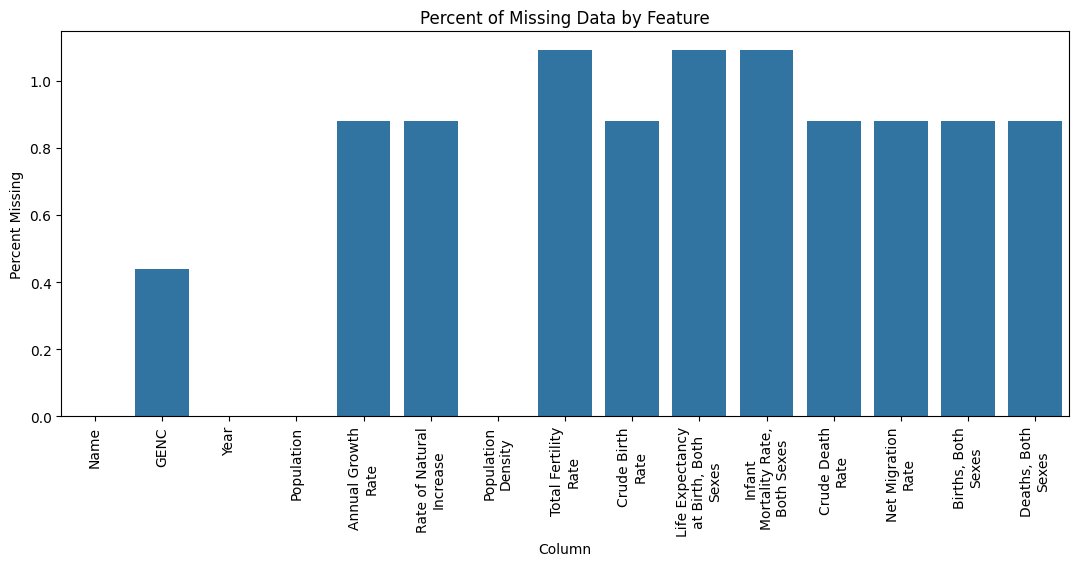

In [11]:
# Importing textwrap for axis labels. (!pip install textwrap if needed)
import textwrap

# Creating the wrapped labels for visual appeal and space saving
wrapped_labels = [textwrap.fill(column, width=15,break_long_words=False) for column in df.columns]

# Setting the plot size
plt.figure(figsize=(13,5))

# Creating the bar plot of missing values
# Summing the null values for each feature and dividing by the number of rows (converted to percent)
sns.barplot(x=wrapped_labels,y=df.isnull().sum()/len(df)*100)

# Setting axis labels
plt.xlabel("Column")
plt.ylabel("Percent Missing")

# Rotating the x-axis by 90 degrees.
plt.xticks(rotation=90)

# Set the plot title
plt.title("Percent of Missing Data by Feature")

# Display the plot
plt.show()

<br>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
This visualization quickly enables us to determine the percentage of data missing for each feature.  The majority of the features have between 0.8% and ~ 1% missing values, but GENC has around 0.4% of missing data.  GENC is a country identifier, so we wouldn't expect that to have missing data. After a quick Google search, it's easy to identify what's wrong.  Namibia's GENC, or ISO Alpha 2, country code is NA. These NA values are being recorded as NULL, so Namibia's GENC code was wrongly classisifed as missing.  Let's add it back and then move on to the rest of the data.
</div>
<br>
<br>


In [12]:
# Namibia's ISO 2 (GENC) code is NA, this got removed in the data cleaning steps
df[df['GENC'].isnull()]['Name'].value_counts()

Name
Namibia    25
Name: count, dtype: int64

In [13]:
# Correcting Namibia's GENC 
df.loc[df['Name'] == 'Namibia', 'GENC'] = 'NA'

In [14]:
# Making sure the corrections were made
df[df.GENC == 'NA'].head(3)

Name GENC    Year  Population  Annual Growth Rate  \
141  Namibia   NA  2000.0     1877964                3.24   
369  Namibia   NA  2001.0     1929692                2.21   
597  Namibia   NA  2002.0     1964708                1.39   

     Rate of Natural Increase  Population Density  Total Fertility Rate  \
141                      2.20                 2.3                  4.09   
369                      2.24                 2.3                  4.10   
597                      2.18                 2.4                  4.06   

     Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
141              33.6                                  53.4   
369              34.0                                  53.3   
597              33.7                                  53.1   

     Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
141                               66.5              11.6                10.4   
369                               65.1              11.6                -0.3   
597                               63.6              11.9                -7.9   

     Births, Both Sexes  Deaths, Both Sexes  
141             63023.0             21727.0  
369             65680.0             22443.0  
597             66170.0             23313.0

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Missing Values: Annual Growth Rate
</div>

In [15]:
# Simple check of missing values, annual growth rate.
df[df['Annual Growth Rate'].isnull()]['Name'].value_counts()

Name
United States    12
Puerto Rico      10
Sudan             8
South Sudan       8
Libya             6
Syria             4
Honduras          1
Sri Lanka         1
Name: count, dtype: int64

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
We can see that there are 8 countries with missing entries for Annual Growth Rate, and ironically enough, the United States and its' territory Puerto Rico are missing the most entries. Given that we got the data from the official US Census Bureau website, this is really unfortunate. To save us some time so we don't have to check all features individually, let's check missing values by country to see if any patterns emerge.  
</div>
<br><br>

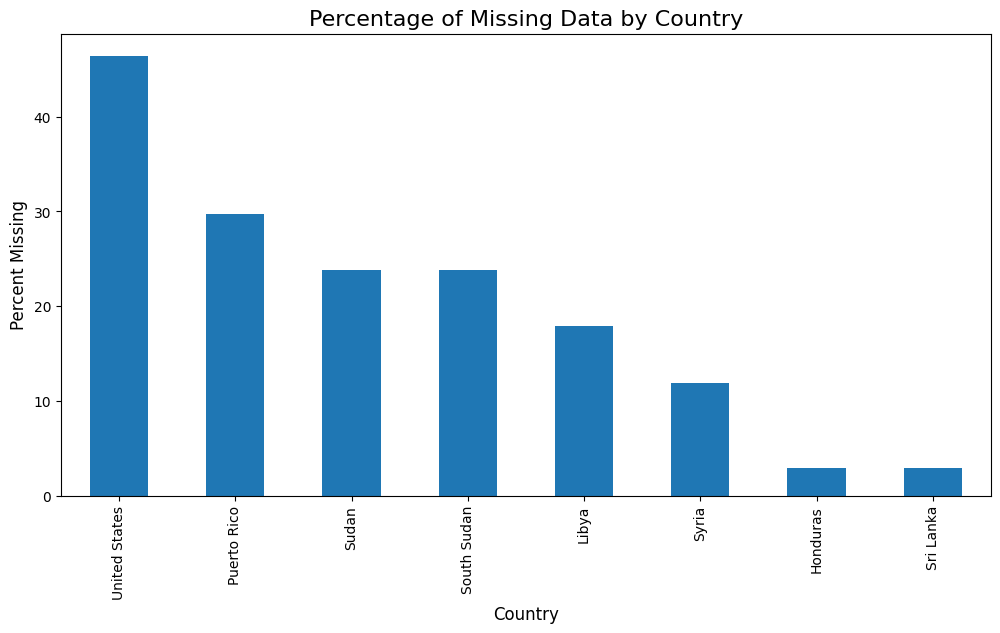

In [16]:
# Gathering the counts of all missing data by country
percent_missing_by_country = df.set_index('Name').isnull().mean(axis=1) * 100

# Removing the countries that have no missing data
percent_missing_by_country = percent_missing_by_country[percent_missing_by_country > 0]

# Aggregating the countries to only show a single country once and dividing the sum by the number of years
percent_missing_by_country_unique = percent_missing_by_country.groupby(level=0).sum() / (max(df.Year) - min(df.Year))

# Setting the plot size
plt.figure(figsize=(12, 6))

# Sorting the x axis by percent missing
percent_missing_by_country_unique.sort_values(ascending=False).plot(kind='bar')

# Setting the plot title and xlab and ylab
plt.title('Percentage of Missing Data by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percent Missing', fontsize=12)

# Rotating the x tick labels
plt.xticks(rotation=90, fontsize=10)

# Showing the plot
plt.show()


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Wow, we just got extremely lucky with only 8 countries total with missing data. The United States has an astounding number of missing values even though we got the data directly from the United States Census Bureau website. I don't think anyone would have expected that!  
</div>

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
We must determine what to do about the missing data. We have three main options that we can take: find the country data, impute the country data, or remove the countries from our analysis. Unfortunately, for the United States we are going to remove the country from our analysis. There is far too much missing data, and we can't trust someone else to have their information if they don't even have their own information. That one is painful, but it must be done. We are also going to remove all of the countries except the bottom two. For Sri Lanka, and Honduras we will impute the data using the K-Nearest Neighbors imputer.  Basically, we are going to use the country data available for each of them to predict their own missing data. 
</div>

<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
For more information on handling missing data with various techniques, see this article by Jason Brownlee. 
</div>

<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://machinelearningmastery.com/handle-missing-data-python/" target="_blank">
    How to Handle Missing Data with Python (external link)
  </a>
</div>

<br>
<br>

---------------------------------------------------------

<a id="imputation"></a>
<h3 style="font-family: Georgia; font-size: 28px;">K-NN Imputer</h3>

In [17]:
# Define the countries we want to impute
countries_missing = ['Sri Lanka', 'Honduras']
# Check the missing rows for the data
missing_rows = df[df['Name'].isin(countries_missing) & df.isnull().any(axis=1)].sort_values(by='Name')

# Displaying the missing rows
missing_rows

Name GENC    Year  Population  Annual Growth Rate  \
89    Honduras   HN  2000.0     6367242                 NaN   
192  Sri Lanka   LK  2000.0    19041167                 NaN   

     Rate of Natural Increase  Population Density  Total Fertility Rate  \
89                        NaN                56.9                   NaN   
192                       NaN               294.6                   NaN   

     Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
89                NaN                                   NaN   
192               NaN                                   NaN   

     Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
89                                 NaN               NaN                 NaN   
192                                NaN               NaN                 NaN   

     Births, Both Sexes  Deaths, Both Sexes  
89                  NaN                 NaN  
192                 NaN                 NaN

In [18]:
# Importing the KNN imputer to fill in the missing values
from sklearn.impute import KNNImputer

# Gathering the Sri Lanka data
sri_lanka_data = df[df['Name'] == 'Sri Lanka']

# Initializing the KNN Imputer with 2 neighbors
knn_imputer = KNNImputer(n_neighbors=2)

# Imputing all missing data in the columns that contain numeric values
sri_lanka_data.iloc[:, 2:] = knn_imputer.fit_transform(sri_lanka_data.iloc[:, 2:])

# Updating the dataset with the new Sri Lanka
df.update(sri_lanka_data)

In [19]:
# Gathering the Honduras data
honduras_data = df[df['Name'] == 'Honduras']

# Initializing the KNN Imputer with 2 neighbors
knn_imputer = KNNImputer(n_neighbors=2)

# Imputing all missing data in the columns that contain numeric values
honduras_data.iloc[:, 2:] = knn_imputer.fit_transform(honduras_data.iloc[:, 2:])

# Updating the dataset with the new Sri Lanka
df.update(honduras_data)

In [20]:
df[df['Name'] == 'Sri Lanka'].head(3)

Name GENC    Year  Population  Annual Growth Rate  \
192  Sri Lanka   LK  2000.0    19041167                1.10   
420  Sri Lanka   LK  2001.0    19074889                1.01   
648  Sri Lanka   LK  2002.0    19285932                1.19   

     Rate of Natural Increase  Population Density  Total Fertility Rate  \
192                      1.31               294.6                 2.365   
420                      1.28               295.1                 2.350   
648                      1.34               298.4                 2.380   

     Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
192              19.2                                  73.1   
420              19.1                                  72.6   
648              19.3                                  73.6   

     Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
192                              12.55              6.05               -2.15   
420                              13.10              6.20               -2.80   
648                              12.00              5.90               -1.50   

     Births, Both Sexes  Deaths, Both Sexes  
192            367929.0            115871.0  
420            363306.0            118406.0  
648            372552.0            113336.0

In [21]:
df[df['Name'] == 'Honduras'].head(3)

Name GENC    Year  Population  Annual Growth Rate  \
89   Honduras   HN  2000.0     6367242                2.46   
317  Honduras   HN  2001.0     6535344                2.48   
545  Honduras   HN  2002.0     6698323                2.44   

     Rate of Natural Increase  Population Density  Total Fertility Rate  \
89                      2.705                56.9                 4.045   
317                     2.740                58.4                 4.110   
545                     2.670                59.9                 3.980   

     Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
89              32.95                                  68.3   
317             33.40                                  68.1   
545             32.50                                  68.5   

     Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
89                               28.35               5.9               -2.45   
317                              28.90               6.0               -2.60   
545                              27.80               5.8               -2.30   

     Births, Both Sexes  Deaths, Both Sexes  
89             217876.5             38920.0  
317            218109.0             38968.0  
545            217644.0             38872.0

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The missing rows for Honduras and Sri Lanka are both filled, and look pretty reasonable. For the other 6 countries with missing data, we are going to remove them from the dataset, which will still give us 221 countries to analyze.
</div>

<br>
<br>

In [22]:
# Creating a list of countries to remove
remove_countries = ['Libya','Puerto Rico', "South Sudan", "Sudan","United States","Syria"]

# Writting over the data frame with the removed countries
df = df[~df['Name'].isin(remove_countries)]

In [23]:
# Checking to make sure all missing values have been accounted for
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5525 entries, 1 to 5699
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  5525 non-null   object 
 1   GENC                                  5525 non-null   object 
 2   Year                                  5525 non-null   float64
 3   Population                            5525 non-null   int64  
 4   Annual Growth Rate                    5525 non-null   float64
 5   Rate of Natural Increase              5525 non-null   float64
 6   Population Density                    5525 non-null   float64
 7   Total Fertility Rate                  5525 non-null   float64
 8   Crude Birth Rate                      5525 non-null   float64
 9   Life Expectancy at Birth, Both Sexes  5525 non-null   float64
 10  Infant Mortality Rate, Both Sexes     5525 non-null   float64
 11  Crude Death Rate      

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Thats it for our missing data! We now have 5,525 rows and no missing values. That covers all of our data cleaning steps, for now.  Every dataset is different, and all require different steps.  It's fundamental that you analyze your data closely, and clean your data appropriately for the dataset you are working with.  The next step of the data science pipeline is EDA, Exploratory Data Analysis. This is where we will begin to discover and visualize our data in depth.  There may be more data cleaning steps we discover in the EDA phase, but that's part of exploring and learning the data. Let's get started!
</div>
<br>
<br>

--------------------------------------------------------------------------

<a id="eda"></a>
<h1 style="font-family: Georgia; font-size: 28px;">Exploratory Data Analysis</h1>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  Exploratory Data Analysis is one of the most exciting phases of the data science pipeline. It’s the beginning of a deeper investigation into your data, enabling you to get an understanding of the structure of the data by identifying underlying patterns and draw meaningful connections between your features and the real-world. The EDA phase of the data science pipeline allows you to visualize and interpret the data for a greater understanding, laying the groundwork for further analysis. During EDA you begin to make sense of your data by turning complexity into clarity through statistics, tables, graphs, and visualizations, making it an essential step in the data science pipeline. For a simple definition of EDA and further reading, check out the definition and link below from IBM.

</div>

<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
<em>“Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.”</em> 
</div>

<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.ibm.com/topics/exploratory-data-analysis" target="_blank">
    What is EDA? (external link)
  </a>
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
A good starting point for EDA is performing a descriptive analysis of your data, which can be quickly achieved using Pandas' describe() method.
</div>

In [24]:
# Descriptive Analysis of the data
df.describe()

Year    Population  Annual Growth Rate  \
count  5525.000000  5.525000e+03         5525.000000   
mean   2012.000000  3.041586e+07            1.242454   
std       7.211755  1.269315e+08            3.272166   
min    2000.000000  3.951000e+03         -115.360000   
25%    2006.000000  4.641450e+05            0.360000   
50%    2012.000000  5.238011e+06            1.080000   
75%    2018.000000  1.953645e+07            2.080000   
max    2024.000000  1.412197e+09          121.110000   

       Rate of Natural Increase  Population Density  Total Fertility Rate  \
count               5525.000000         5525.000000           5525.000000   
mean                   1.266667          429.901593              2.711613   
std                    1.079953         1853.432481              1.439489   
min                   -1.400000            0.000000              0.680000   
25%                    0.410000           36.800000              1.690000   
50%                    1.150000           89.300000              2.160000   
75%                    2.050000          218.400000              3.380000   
max                    4.030000        23015.200000              8.300000   

       Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
count       5525.000000                           5525.000000   
mean          20.466597                             72.022244   
std           10.787659                              8.248048   
min            4.300000                             29.600000   
25%           11.500000                             67.700000   
50%           17.400000                             73.800000   
75%           27.100000                             77.800000   
max           57.200000                             89.900000   

       Infant Mortality Rate, Both Sexes  Crude Death Rate  \
count                        5525.000000       5525.000000   
mean                           25.238643          7.803339   
std                            24.761457          3.086721   
min                             1.500000          1.200000   
25%                             6.800000          5.700000   
50%                            15.400000          7.300000   
75%                            36.400000          9.400000   
max                           197.800000         33.400000   

       Net Migration Rate  Births, Both Sexes  Deaths, Both Sexes  
count         5525.000000        5.525000e+03        5.525000e+03  
mean            -0.241738        5.888977e+05        2.361727e+05  
std             31.312670        2.128713e+06        9.576988e+05  
min          -1152.600000        3.300000e+01        3.200000e+01  
25%             -3.400000        6.954000e+03        2.354000e+03  
50%             -0.300000        7.808400e+04        3.870100e+04  
75%              2.200000        4.663710e+05        1.551320e+05  
max           1211.800000        2.726854e+07        1.534324e+07

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The descriptive analysis quickly calculates some metrics for us, but it's in the visualizations that you truly begin to understand your data.  Let's create three plots that visualize the Population Per Year, Population Density by Year, and Net Migration by Year as an aggregated sum of all countries.
</div>

<br>
<br>

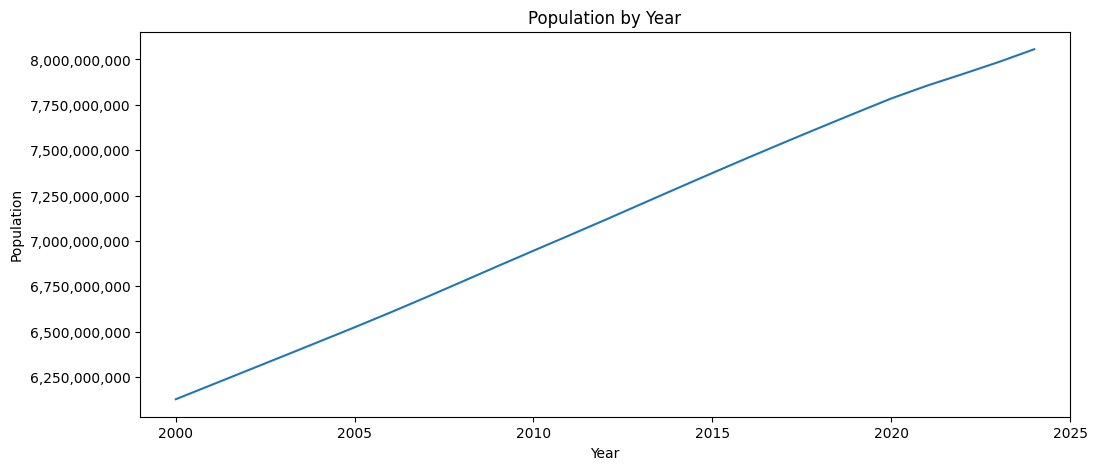

In [25]:
# Importing FuncFormatter to control the y-axis tick labels
from matplotlib.ticker import FuncFormatter

# Custom function to format y-axis as plain numbers
# Default is scientific notation
def format_number(x, _):
    return f"{int(x):,}" 

# Sum of population totals per year
# Here we are using all countries, which is why its important to save the unaltered data.
# (note) Our raw population data had no missing values 
pop_by_year = df_all_countries.groupby('Year')['Population'].sum().reset_index()

# Creating the plot of Population by Year
plt.figure(figsize=(12,5))
sns.lineplot(data=pop_by_year,x='Year',y="Population")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xlim(1999, 2025)
plt.show()

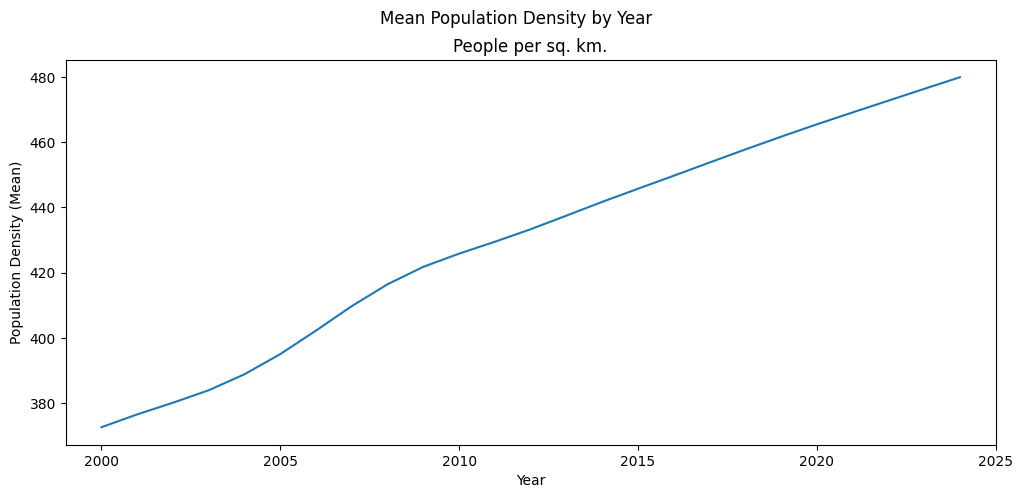

In [26]:
# Creating an aggregated population density metric by mean
pop_den_by_year = df.groupby('Year')['Population Density'].mean().reset_index()

# Creating the Mean Population Density Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=pop_den_by_year, x='Year', y='Population Density')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.suptitle('Mean Population Density by Year')
plt.title("People per sq. km.")
plt.xlabel('Year')
plt.ylabel('Population Density (Mean)')
plt.xlim(1999, 2025)
plt.show()


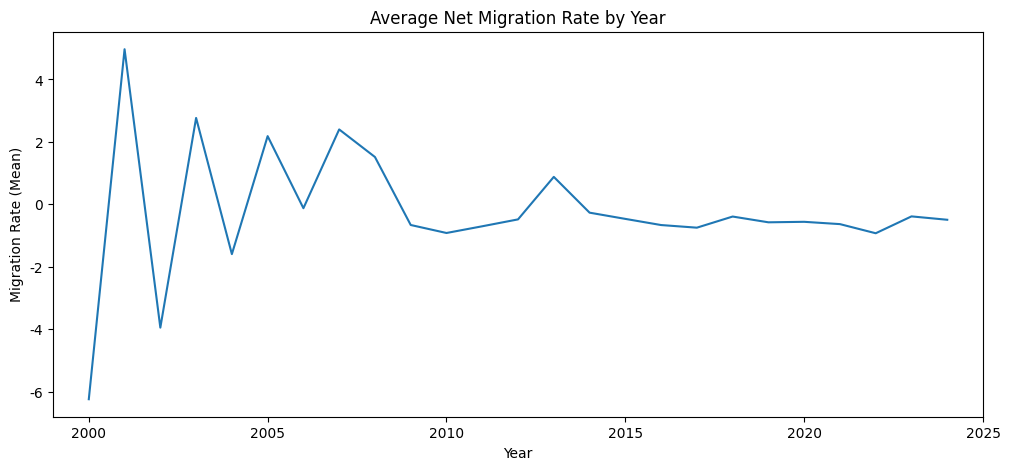

In [27]:
# Creating an aggregated net migration metric by mean
pop_by_year = df.groupby('Year')['Net Migration Rate'].mean().reset_index()

# Creating the net migration Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=pop_by_year, x='Year', y='Net Migration Rate')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))
plt.title('Average Net Migration Rate by Year')
plt.xlabel('Year')
plt.ylabel('Migration Rate (Mean)')
plt.xlim(1999, 2025)
plt.show()

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  These three plots are simple univariate visualizations displayed over time by year, but they unlock some underlying data about our world. Let’s give a brief description of what we found:
  <ol>
    <li><strong><u>World Population per Year:</u></strong>  <br>  There has been almost a 2 Billion increase in people since 2000! The population now sets ~8 Billion people world-wide. </li>
      <br>
    <li><strong><u>Mean Population Density per Year:</u></strong>  <br>The population density has risen by ~100 people per square kilometer on average world-wide.</li>
      <br>
    <li><strong><u>Average Net Migration Rate:</u></strong> <br>From 2000 to 2010, the average net migration rate was erradic, with extreme movement in both directions, but after 2010 it began to stabilize.</li>
  </ol>
</div>

<br>
<br>


<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  The erratic net migration rate from 2000 to 2010 can partly be understood by looking at the next table, which shows high and low swings of net migration by Montserrat, and one high net migration in UAE. The Montserrat net migration rate can be explained by an active volcano on the island which has caused several migrations of people out of the country during evacuations, and then back into the country during resettling. More about the  Soufrière Hills Volcano can be read on the Global Volcanism Program website sponsored by the Smithsonian Institution at the following link:

  </div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://volcano.si.edu/volcano.cfm?vn=360050" target="_blank">
   Soufrière Hills (external link)
  </a>
</div>
<br>
<br>

In [28]:
# High net migration in the data
high_net_migration = df[abs(df['Net Migration Rate']) > 250]
high_net_migration

Name GENC    Year  Population  Annual Growth Rate  \
138             Montserrat   MS  2000.0        3951             -115.36   
366             Montserrat   MS  2001.0        4239              121.11   
594             Montserrat   MS  2002.0        4810              -82.97   
822             Montserrat   MS  2003.0        4491               74.68   
1050            Montserrat   MS  2004.0        4963              -48.58   
1278            Montserrat   MS  2005.0        4530               34.08   
1506            Montserrat   MS  2006.0        4625              -29.25   
2037  United Arab Emirates   AE  2008.0     7159278               28.50   

      Rate of Natural Increase  Population Density  Total Fertility Rate  \
138                      -0.10                38.7                  1.34   
366                      -0.07                41.6                  1.20   
594                       0.21                47.2                  1.18   
822                      -0.33                44.0                  0.94   
1050                     -0.18                48.7                  0.98   
1278                      0.09                44.4                  1.45   
1506                      0.04                45.3                  1.08   
2037                      1.04                85.6                  1.81   

      Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
138               12.2                                  72.6   
366               11.1                                  72.1   
594               11.2                                  73.0   
822                8.9                                  71.5   
1050               9.5                                  73.1   
1278              13.9                                  71.1   
1506              10.6                                  72.4   
2037              11.7                                  77.2   

      Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
138                                16.5              13.2             -1152.6   
366                                17.5              11.8              1211.8   
594                                15.8               9.2              -831.8   
822                                18.7              12.3               750.2   
1050                               15.6              11.3              -484.0   
1278                               19.7              13.0               340.0   
1506                               16.9              10.2              -293.0   
2037                                7.8               1.2               274.5   

      Births, Both Sexes  Deaths, Both Sexes  
138                 48.0                52.0  
366                 47.0                50.0  
594                 54.0                44.0  
822                 40.0                55.0  
1050                47.0                56.0  
1278                63.0                59.0  
1506                49.0                47.0  
2037             83427.0              8793.0

-----------------------------------------



<a id="corr_matrix"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Correlation Matrix</h2>

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  Another major aspect of EDA is exploring the correlation between features. Understanding feature correlation, particularly multicollinearity, is a crucial part of data discovery and should be examined regardless of your dataset. Multicollinearity can significantly impact data analysis and predictive modeling, as we will explore shortly. For now, let’s create a correlation matrix to visualize the relationships between our independent features.

</div>

<br>
<br>

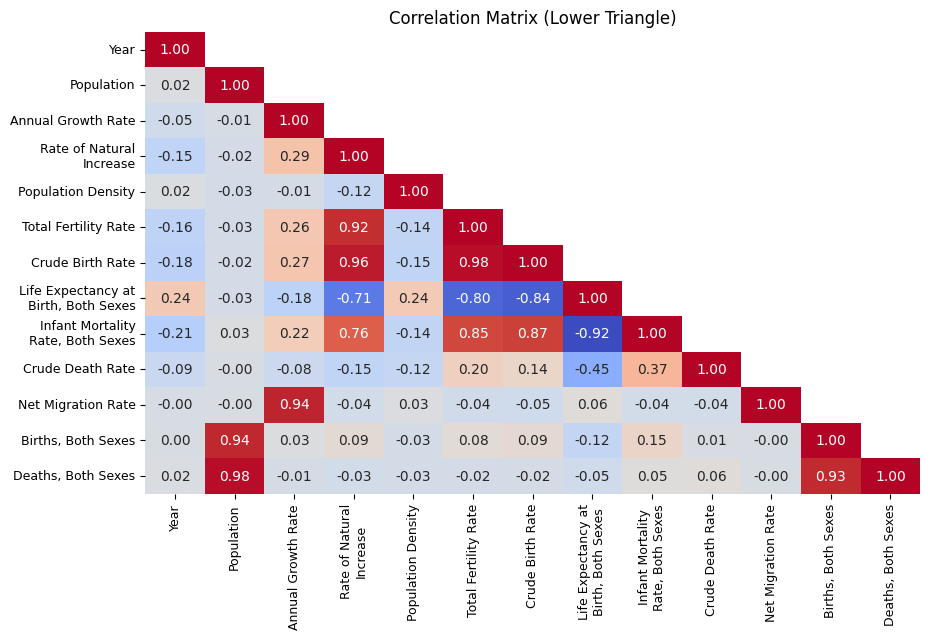

In [29]:
# Creating the correlation Matrix
corr_matrix = df.iloc[:,2:].corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool),k=1)

# Function to wrap long labels
def wrap_labels(labels, width):
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]

# Wrapping the x and y axis labels to condense the vizualization
wrapped_columns = wrap_labels(corr_matrix.columns, width=20)

# Setting the figure size of the heatmap
plt.figure(figsize=(10, 6))

# Creating the heatmap
sns.heatmap(
    corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=False,
    xticklabels=wrapped_columns, yticklabels=wrapped_columns, cbar=False)

# Setting the plot title
plt.title('Correlation Matrix (Lower Triangle)')

# Changing the tick mark label sizes
plt.xticks(fontsize=9)  
plt.yticks(fontsize=9)  

# Showing the plot
plt.show()


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The correlation matrix shows that we have some strong correlation between several of our independent variables. The strongest correlation present is between Population and Deaths with a 98% correlation. This simply means that as the population of a country increases, so does its number of deaths, which makes perfect sense. The strongest negative correlation present is between Infant Mortality and Life Expectancy with a -92% correlation, meaning the higher the infant mortality rate, the lower the life expectancy of a country. 

</div>

<br>
<br>


<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  Let's take a closer look and highlight some of our major correlations to life expectancy.
  <ol>
    <li><strong>Life Expectancy & Year:</strong> 24% </li>
      <br>
    <li><strong>Life Expectancy & Population Density:</strong> 24%</li>
      <br>
    <li><strong>Life Expectancy & Crude Death Rate:</strong> -45%</li>
      <br>
    <li><strong>Life Expectancy & Rate of Natural Increase:</strong> -71%</li>
      <br>
    <li><strong>Life Expectancy & Total Fertility Rate:</strong> -80%</li>
      <br>
    <li><strong>Life Expectancy & Crude Birth Rate:</strong> -84%</li>
      <br>
    <li><strong>Life Expectancy & Infant Mortality Rate:</strong> -92%</li>
  </ol>
</div>

<br>

---------------------------------------------------



<a id="extra_eda"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Further EDA Analysis</h2>



<div style="text-align: left; font-size: 18px; font-family: Georgia;">
For the remainder of the Exploratory Data Analysis, we’ll focus on creating various visualizations to explore our data. This section will be mostly code-based, with one exception: a bit more data cleaning to correct country names for mapping purposes. Effective visualizations tell the story of the data, and when done well, they require minimal explanation. We’ll resume commentary when we shift to analyzing our target variable, Life Expectancy.
</div>

<br>
<br>


In [30]:
# Creating an aggregated dataset of mean values by Country
aggregated_by_country = df.groupby('Name', as_index=False).agg({
    'GENC': 'first',    
    'Year': 'mean',
    'Population': 'mean',                  
    'Annual Growth Rate': 'mean',         
    'Rate of Natural Increase': 'mean',    
    'Population Density': 'mean',          
    'Total Fertility Rate': 'mean',       
    'Crude Birth Rate': 'mean',         
    'Life Expectancy at Birth, Both Sexes': 'mean',  
    'Infant Mortality Rate, Both Sexes': 'mean',     
    'Crude Death Rate': 'mean',            
    'Net Migration Rate': 'mean',          
    'Births, Both Sexes': 'mean',           
    'Deaths, Both Sexes': 'mean'           
})

# Showing the first three rows
aggregated_by_country.head(3)


Name GENC    Year   Population  Annual Growth Rate  \
0  Afghanistan   AF  2012.0  35682196.00              2.8872   
1      Albania   AL  2012.0   2843029.20             -0.8524   
2      Algeria   DZ  2012.0  38002869.36              1.7740   

   Rate of Natural Increase  Population Density  Total Fertility Rate  \
0                    3.1944              54.712                6.0984   
1                    0.4932             103.764                1.5200   
2                    1.8664              15.948                2.8040   

   Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
0            40.204                                61.660   
1            12.188                                76.076   
2            23.008                                75.660   

   Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
0                             60.688             8.252              -3.068   
1                             15.592             7.256             -13.448   
2                             25.760             4.352              -0.944   

   Births, Both Sexes  Deaths, Both Sexes  
0          1413325.08           284472.72  
1            34938.48            20419.80  
2           877749.52           165181.36

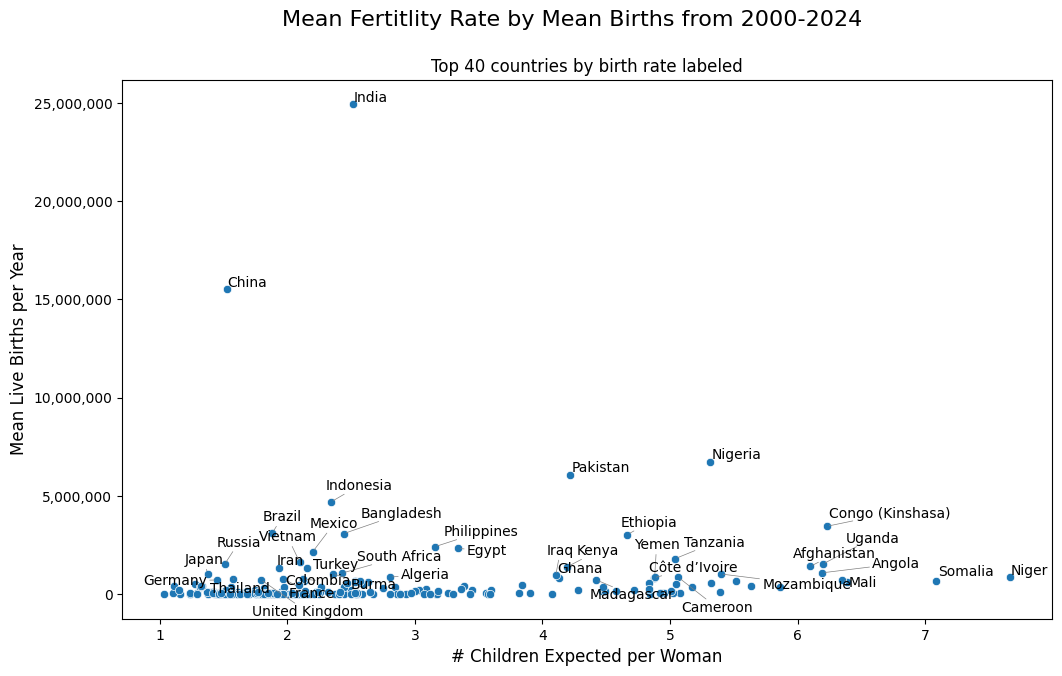

In [31]:
# Using adjust text to add seperation to plot labels
from adjustText import adjust_text

# Getting the top 40 countries with the highest mean births
country_birth_rates = aggregated_by_country.nlargest(40, 'Births, Both Sexes')

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot
sns.scatterplot(data=aggregated_by_country, x='Total Fertility Rate', y='Births, Both Sexes')

# Creating a list to hold the top 40 country birth labels
texts = []

# Collecting the country names in the list
for _, row in country_birth_rates.iterrows():
    texts.append(plt.text(x=row['Total Fertility Rate'],  y=row['Births, Both Sexes'], s=row['Name'], fontsize=10))

# Writing the text on the plot (Avoids overlapping text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Preventing the y-axis from formatting in scientific notation (previously written funcion)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

# Setting the plot title and subtitle
plt.suptitle('Mean Fertitlity Rate by Mean Births from 2000-2024', fontsize=16)
plt.title("Top 40 countries by birth rate labeled")

# Setting the axis labels
plt.xlabel('# Children Expected per Woman', fontsize=12)
plt.ylabel('Mean Live Births per Year', fontsize=12)

# Showing the plot
plt.show()


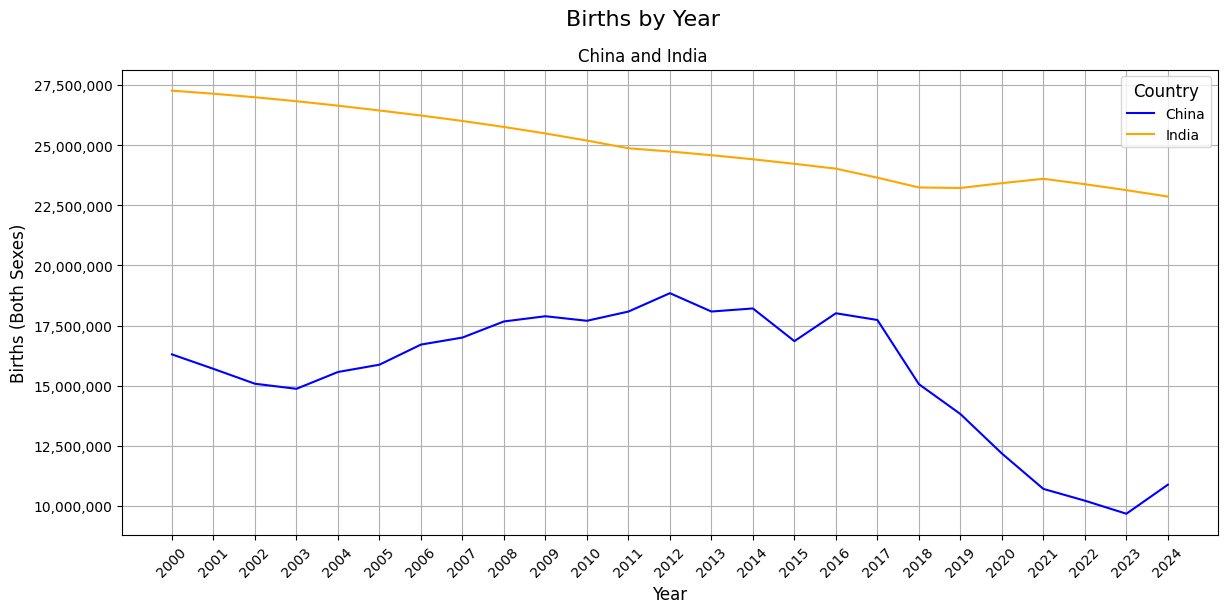

In [32]:
# China and India's data
china_data = df[df['Name'] == 'China']
india_data = df[df['Name'] == 'India']

# Plotting country births
plt.figure(figsize=(12, 6))
sns.lineplot(data=china_data, x='Year', y='Births, Both Sexes', label='China', color='blue')
sns.lineplot(data=india_data, x='Year', y='Births, Both Sexes', label='India', color='orange')

# Adding titles and adjusting the plot
plt.suptitle('Births by Year', fontsize=16,x=.5)
plt.title('China and India', fontsize=12,x=.475)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Births (Both Sexes)', fontsize=12)
plt.legend(title='Country', fontsize=10, title_fontsize=12)
plt.grid(True)
plt.tight_layout()

# Using the previously written function to format the y axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

# Placing tick marks every year
plt.xticks(ticks=range(2000, 2025), rotation=45)

# displaying the plot
plt.show()


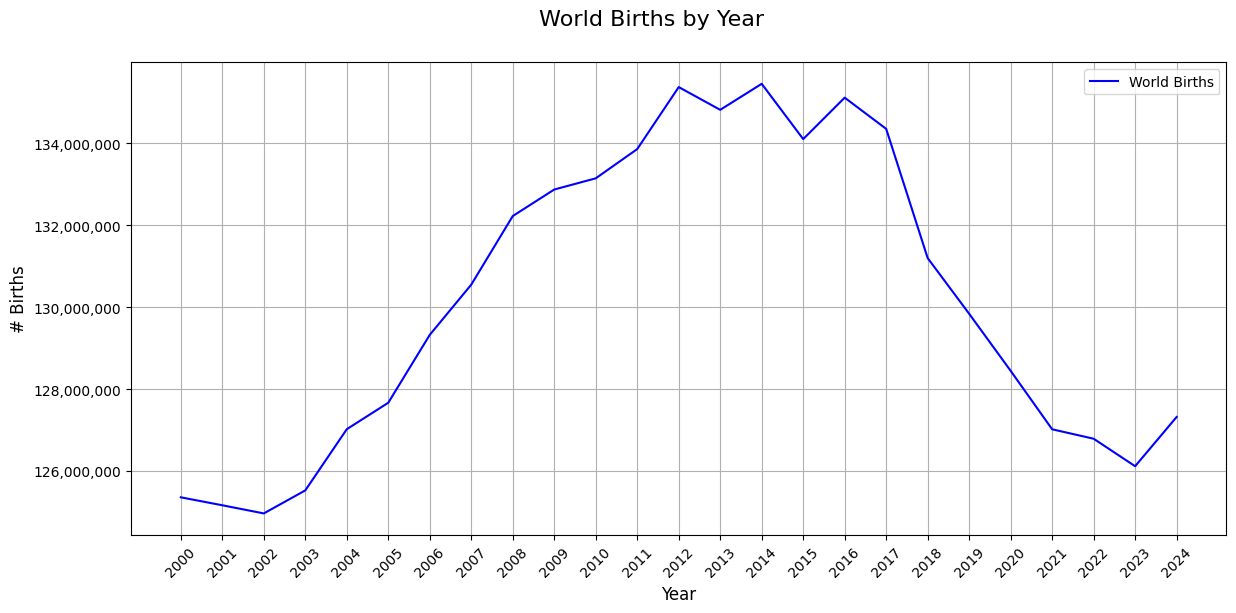

In [33]:
# Getting agg world population
world_population_by_year = df.groupby('Year')['Births, Both Sexes'].sum().reset_index()

# Plotting country data
plt.figure(figsize=(12, 6))
sns.lineplot(data=world_population_by_year, x='Year', y='Births, Both Sexes', label='World Births', color='blue')

# Designing the plot
plt.suptitle('World Births by Year', fontsize=16,x=.5)
plt.xlabel('Year', fontsize=12)
plt.ylabel('# Births', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Using the previously written function to format the y axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

# Setting tick marks to be every year
plt.xticks(ticks=range(2000, 2025), rotation=45)

# Show the plot
plt.show()

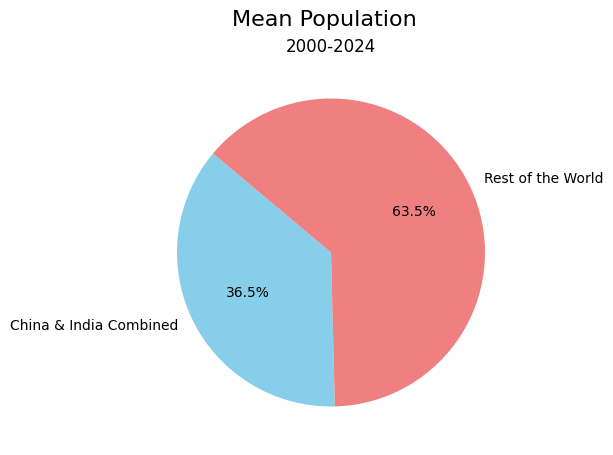

In [34]:
# Using the "df_all_countries" dataframe to include the USA and other missing countries 
# that had filled population data but were missing other features.

# Getting Chinas mean Population from 2000-2024
pop_china = df_all_countries[df_all_countries['Name']== 'China'].Population.mean()

# Getting Indias mean Population from 2000-2024
pop_india = df_all_countries[df_all_countries['Name']== 'India'].Population.mean()

# Combining china and india population totals
pop_china_india = pop_china + pop_india

# Getting total mean population from all countries
total_pop = df_all_countries.groupby('Year')['Population'].sum().mean()

# Subtracting china and indias population from the world mean
pop_rest_of_world = total_pop - pop_china_india

# Setting the labels for the Pie Chart
labels = ['China & India Combined', 'Rest of the World']

# Defining the size of the wedges
sizes = [pop_china_india, pop_rest_of_world]

# Setting the colors of the pie plot
colors = ['skyblue', 'lightcoral']

# Setting the figure size of the pie chart
plt.figure(figsize=(5, 5))

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)

# Setting a title for the plot
plt.suptitle('Mean Population', fontsize=16)
plt.title("2000-2024")
plt.show()

In [35]:
# Getting 2024 values for China & India vs the rest of the world
china_pop_2024 = df_all_countries[(df_all_countries['Name'] == 'China') & (df_all_countries['Year'] == 2024)].reset_index().Population[0]
india_pop_2024 = df_all_countries[(df_all_countries['Name'] == 'India') & (df_all_countries['Year'] == 2024)].reset_index().Population[0]
total_pop_2024 = df_all_countries[df_all_countries['Year']==2024].Population.sum()
pop_2024_china_india = china_pop_2024 + india_pop_2024
pop_2024_remain = total_pop_2024 - pop_2024_china_india

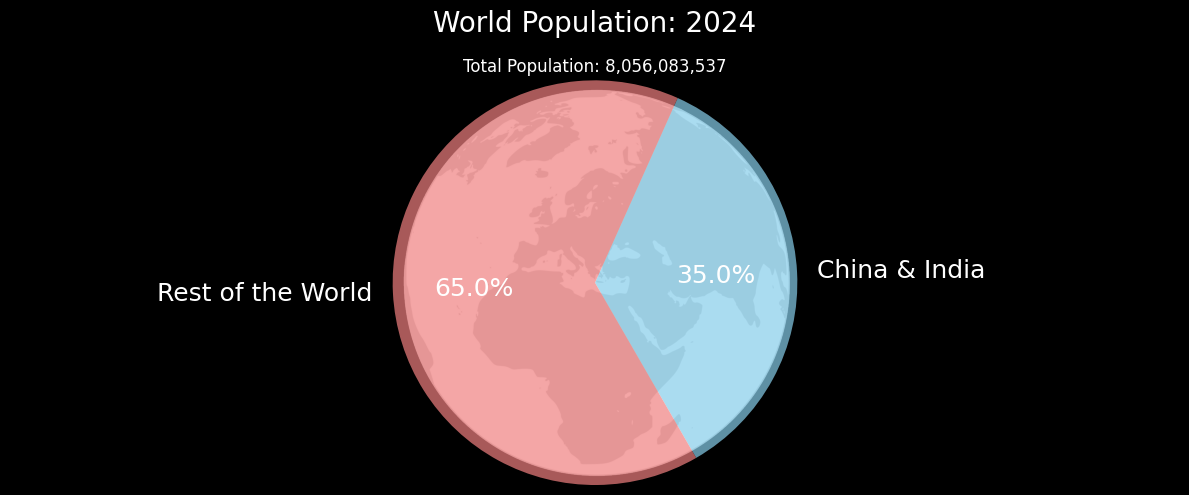

In [36]:
# Importing Image from PIL to handle the background globe image
from PIL import Image

# Importing requests to get the image of the globe
import urllib.request

# Setting the pie chart labels
labels = ['China & India', 'Rest of the World']

# Setting the pie chart dimensions
sizes = [pop_2024_china_india, pop_2024_remain]

# Setting the colors of the pie plot
colors = ['skyblue', 'lightcoral']

# Loading the globe image from the URL using Pillow
url = 'https://www.freepnglogos.com/uploads/globe-png/file-blank-globe-svg-wikimedia-commons-40.png'
with urllib.request.urlopen(url) as f:
    globe_image = Image.open(f)
    globe_image = np.array(globe_image)

# Setting the size of the vizualization
fig, ax = plt.subplots(figsize=(12, 5))

# Setting the background color to black
fig.patch.set_facecolor('black') 

# Adding the globe to be the background of the pie chart
ax.imshow(globe_image, extent=[-1, 1, -1, 1], alpha=1, zorder=0) 

# Creating the pie chart, setting the alpha level for transparency, and changing the font color to white
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=300,
    textprops={'fontsize': 18, 'color': 'white'},
    wedgeprops={'zorder': 1, 'alpha': 0.7})

# Formatting the total population with commas
formatted_total_population = f"{total_pop_2024:,.0f}"

# Adding a title and sub title to the plot
plt.suptitle('World Population: 2024', fontsize=20, color='white')
plt.title(f'Total Population: {formatted_total_population}', color='white')

# Removing the axis for a cleaner look 
ax.axis('equal')  
ax.axis('off')   

# Showing the plot with a tight layout
plt.tight_layout()
plt.show()


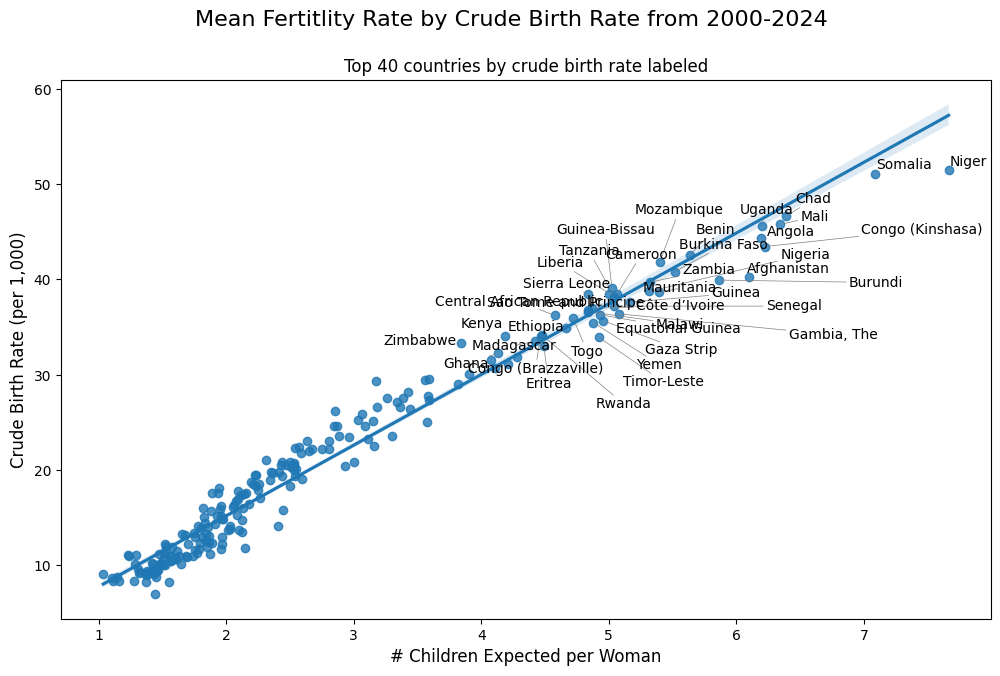

In [37]:
# Importing adjustText to help with plot labels
from adjustText import adjust_text

# Getting the top 40 countries with the highest crude birth rates
country_death_rates = aggregated_by_country.nlargest(40, 'Crude Birth Rate')

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot
sns.regplot(data=aggregated_by_country, x='Total Fertility Rate', y='Crude Birth Rate')

# Creating a list to hold the top 20 country labels
texts = []

# Collecting the country names in the list
for _, row in country_death_rates.iterrows():
    texts.append(plt.text(x=row['Total Fertility Rate'], y=row['Crude Birth Rate'], s=row['Name'], fontsize=10))

# Writing the text on the plot (Avoids overlapping text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Preventing the y-axis from formatting in scientific notation (previously written funcion)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

# Setting the plot title and subtitle
plt.suptitle('Mean Fertitlity Rate by Crude Birth Rate from 2000-2024', fontsize=16)
plt.title("Top 40 countries by crude birth rate labeled")

# Setting the axis labels
plt.xlabel('# Children Expected per Woman', fontsize=12)
plt.ylabel('Crude Birth Rate (per 1,000)', fontsize=12)

# Showing the plot
plt.show()


---------------------------------------------------


<a id="fol-maps"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Folium Maps</h2>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
For the data visualizations using world maps, we are going to utilize the Folium library.  The Folium library is an extensive graphing library that handles interactive maps extremely well. For more information about Folium maps and getting started, see the following link:
</div>

<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://python-visualization.github.io/folium/latest/" target="_blank">
    Folium (external link)
  </a>
</div>

<br>
<br>

In [38]:
import folium
from folium import Choropleth
from IPython.display import display, IFrame

# Creating a folium map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Creating the choropleth layer
Choropleth(
    geo_data='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json',  
    data=aggregated_by_country,
    columns=['Name', 'Crude Death Rate'],  
    key_on='feature.properties.name',      
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean Crude Death Rate'
).add_to(world_map)

# Saving the world map 
world_map.save("world_map_death_1.html")

<div style="text-align: center; font-size: 24px; font-family: Georgia;">
Map of the Mean Crude Death Rate
</div>

In [39]:
# Change the src to the github repository location
#<iframe src="maps/world_map_death_1.html" width="65%" height="600"></iframe>

# Displaying the map using IFrame
display(IFrame("world_map_death_1.html", width="65%", height="600"))

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
If we examine the map we just created, we notice some countries, like South Korea, appear to have no data despite data being available. This issue arises due to naming inconsistencies between our dataset’s country names and those in the geo.json file used to populate the Folium map. The next two code chunks will identify these discrepancies and resolve the mismatched country names to ensure accurate mapping.
</div>

<br>
<br>


In [40]:
import requests

# Loading the geojson file
geojson_url = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
geojson_data = requests.get(geojson_url).json()

# Getting the geojson country names
geojson_countries = [feature['properties']['name'] for feature in geojson_data['features']]

# Getting our datasets country names
dataset_countries = df['Name'].unique()

# Finding the mismatched countries
non_matching_countries = [country for country in dataset_countries if country not in geojson_countries]

In [41]:
# Correcting all of the country mismatches
name_corrections = {
    'American Samoa': 'Samoa',
    'Bahamas, The': 'Bahamas',
    'Burma': 'Myanmar',
    'Cabo Verde': 'Cape Verde',
    'Congo (Brazzaville)': 'Republic of the Congo',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Curaçao': 'Curacao',
    'Czechia': 'Czech Republic',
    "Côte d’Ivoire": "Ivory Coast",
    'Eswatini': 'Swaziland',
    'Gambia, The': 'Gambia',
    'Gaza Strip': 'Palestinian Territory',
    'Guinea-Bissau': 'Guinea Bissau',
    'Guiana':'French Guiana',
    'Korea, North': 'North Korea',
    'Korea, South': 'South Korea',
    'Macau': 'Macao',
    'Micronesia, Federated States of': 'Micronesia',
    'North Macedonia': 'Macedonia',
    'Saint Barthelemy': 'Saint Barthelemy',
    'Saint Helena, Ascension, and Tristan da Cunha': 'Saint Helena',
    'Saint Kitts and Nevis': 'Saint Kitts and Nevis',
    'Saint Lucia': 'Saint Lucia',
    'Saint Martin': 'Saint Martin',
    'Saint Pierre and Miquelon': 'Saint Pierre and Miquelon',
    'Saint Vincent and the Grenadines': 'Saint Vincent',
    'Serbia':'Republic of Serbia',
    'Tanzania':'United Republic of Tanzania',
    'Timor-Leste': 'Timor Leste',
    'Virgin Islands, British': 'British Virgin Islands',
    'Virgin Islands, U.S.': 'United States Virgin Islands'}

# Applying the corrections
df['Name'] = df['Name'].replace(name_corrections)

In [42]:
# Recreating the aggregated dataset of mean values by country
aggregated_by_country = df.groupby('Name', as_index=False).agg({
    'GENC': 'first',    
    'Year': 'mean',
    'Population': 'mean',                  
    'Annual Growth Rate': 'mean',         
    'Rate of Natural Increase': 'mean',    
    'Population Density': 'mean',          
    'Total Fertility Rate': 'mean',       
    'Crude Birth Rate': 'mean',         
    'Life Expectancy at Birth, Both Sexes': 'mean',  
    'Infant Mortality Rate, Both Sexes': 'mean',     
    'Crude Death Rate': 'mean',            
    'Net Migration Rate': 'mean',          
    'Births, Both Sexes': 'mean',           
    'Deaths, Both Sexes': 'mean'})

In [43]:
# Creating a folium map
world_map = folium.Map(location=[0, 0], zoom_start=2,tiles="OpenStreetMap")

# Creating the choropleth layer
Choropleth(
    geo_data='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json', 
    data=aggregated_by_country,
    columns=['Name', 'Crude Death Rate'],  
    key_on='feature.properties.name',      
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Mean Crude Death Rate'
).add_to(world_map)

# Saving the world map 
world_map.save("world_map_death_2.html")

<div style="text-align: center; font-size: 24px; font-family: Georgia;">
Map of the Mean Crude Death Rate (Fixed)
</div>

In [44]:
# Change the src to the github repository location
#<iframe src="maps/world_map_death_2.html" width="65%" height="600"></iframe>

# Displaying the map using IFrame
display(IFrame("world_map_death_2.html", width="65%", height="600"))

<br>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
This looks much better! While it’s unfortunate that we don’t have data for every country, we still have a solid representation of the world. There are a few areas on the map displaying oddly, such as Somaliland, a territory in Somalia which is unrecognized globally and appears masked out, but overall, the visualization works well.
</div>

<br>
<br>


-----------------------------------------------------------------------

<br>
<a id="eda_le"></a>
<h2 style="font-family: Georgia; font-size: 28px;">EDA: Life Expectancy</h2>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Life Expectancy is the main focus of our analysis and is the feature that we are most interested in. We have explored several of the features up to this point, which is fundamental to understanding our data, but now its time to focus on life expectancy.
</div>

<br>
<br>


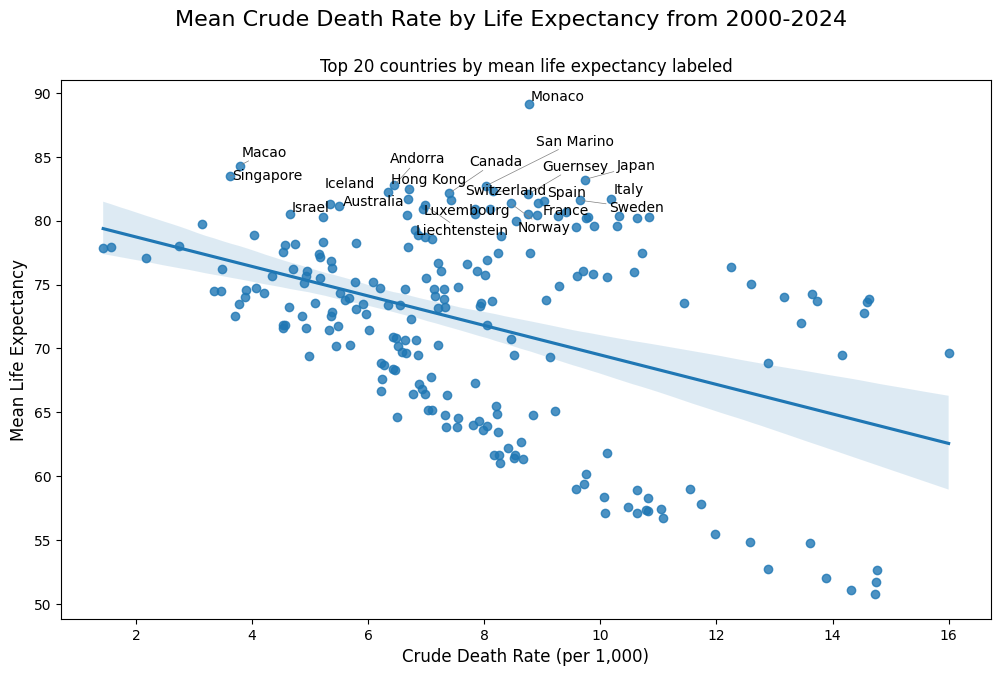

In [45]:
# Importing adjustText to help with plot labels
from adjustText import adjust_text

# Getting the top 20 countries with the highest crude death rate
country_death_rates = aggregated_by_country.nlargest(20, 'Life Expectancy at Birth, Both Sexes')

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot
sns.regplot(
    data=aggregated_by_country, 
    y='Life Expectancy at Birth, Both Sexes', 
    x='Crude Death Rate')

# Creating a list to hold the top 20 country birth labels
texts = []

# Collecting the country names in the list
for _, row in country_death_rates.iterrows():
    texts.append(plt.text(x=row['Crude Death Rate'], y=row['Life Expectancy at Birth, Both Sexes'], s=row['Name'], fontsize=10))

# Writing the text on the plot (Avoids overlapping text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Preventing the y-axis from formatting in scientific notation (previously written funcion)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

# Setting the plot title and subtitle
plt.suptitle('Mean Crude Death Rate by Life Expectancy from 2000-2024', fontsize=16)
plt.title("Top 20 countries by mean life expectancy labeled")

# Setting the axis labels
plt.xlabel('Crude Death Rate (per 1,000)', fontsize=12)
plt.ylabel('Mean Life Expectancy', fontsize=12)

# Showing the plot
plt.show()


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The plot above displays the mean crude death rate against the mean life expectancy. As highlighted in our earlier correlation matrix, we already knew these two features were correlated, but now we can visualize this relationship. Additionally, we’ve enhanced the graphic’s informational value by highlighting the top 20 countries with the highest mean life expectancy.
</div>
<br>
<br>


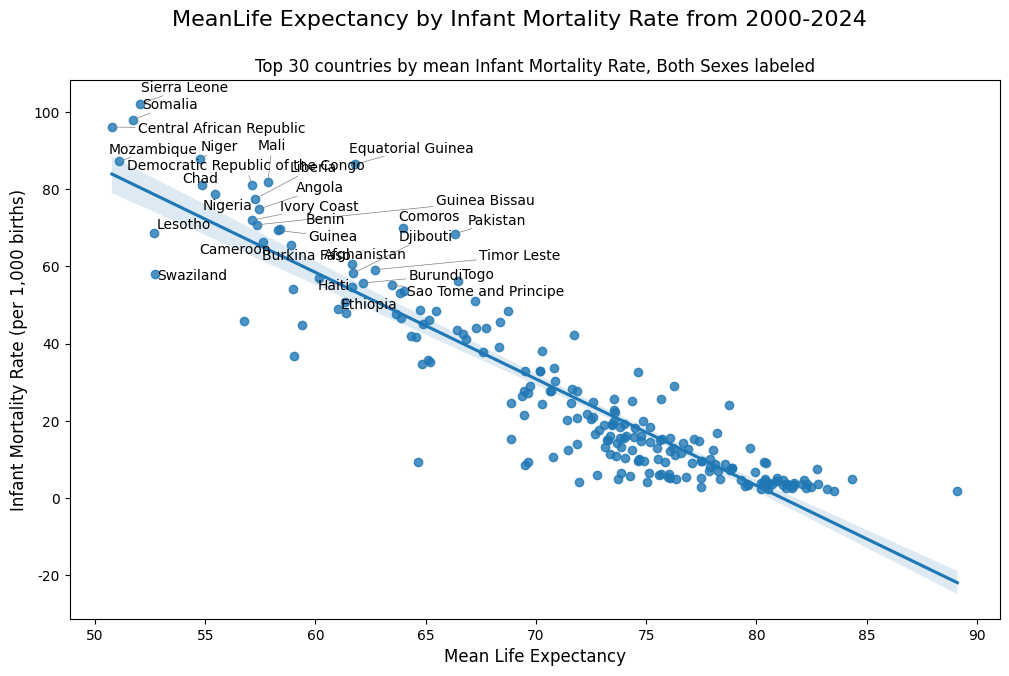

In [46]:
# Importing adjustText to help with plot labels
from adjustText import adjust_text

# Getting the top 20 countries with the highest Infant Mortality Rate
country_death_rates = aggregated_by_country.nlargest(30, 'Infant Mortality Rate, Both Sexes')

# Setting the figure size
plt.figure(figsize=(12, 7))

# Creating the scatter plot
sns.regplot(data=aggregated_by_country, x='Life Expectancy at Birth, Both Sexes', y='Infant Mortality Rate, Both Sexes')

# Creating a list to hold the top 20 country labels
texts = []

# Collecting the country names in the list
for _, row in country_death_rates.iterrows():
    texts.append(plt.text(
            y=row['Infant Mortality Rate, Both Sexes'], 
            x=row['Life Expectancy at Birth, Both Sexes'], 
            s=row['Name'], 
            fontsize=10))

# Writing the text on the plot (Avoids overlapping text)
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Preventing the y-axis from formatting in scientific notation (previously written funcion)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_number))

# Setting the plot title and subtitle
plt.suptitle('MeanLife Expectancy by Infant Mortality Rate from 2000-2024', fontsize=16)
plt.title("Top 30 countries by mean Infant Mortality Rate, Both Sexes labeled")

# Setting the axis labels
plt.ylabel('Infant Mortality Rate (per 1,000 births)', fontsize=12)
plt.xlabel('Mean Life Expectancy', fontsize=12)

# Showing the plot
plt.show()


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The graph above illustrates the relationship between mean life expectancy and infant mortality, which shows the strongest negative correlation in our data at -92%. It is clear that countries with high infant mortality rates tend to have significantly lower life expectancies compared to those with low infant mortality rates. Another striking pattern is the concentration of countries with high infant mortality rates, predominantly in Africa. When this data is visualized on a map (below), the African continent definetly stands out as having the highest infant mortality rates in the world.
</div>
<br>
<br>


In [47]:
# Creating a folium map
world_map = folium.Map(location=[0, 0], zoom_start=2,tiles="OpenStreetMap")

# Creating the choropleth layer
Choropleth(
    geo_data='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json',  
    data=aggregated_by_country,
    columns=['Name', 'Infant Mortality Rate, Both Sexes'],  
    key_on='feature.properties.name',      
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Infant Mortality Rate, Both Sexes'
).add_to(world_map)

# Saving the world map 
world_map.save("world_map_inf_mort.html")

<div style="text-align: center; font-size: 24px; font-family: Georgia;">
Map of Infant Mortality Rate
</div>

In [48]:
# Change the src to the github repository location
#<iframe src="maps/world_map_inf_mort.html" width="65%" height="600"></iframe>

# Displaying the map using IFrame
display(IFrame("world_map_inf_mort.html", width="65%", height="600"))

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Now let’s examine life expectancy across all countries for each year in a single visualization. This includes data from 220 countries for a total of 5,525 life expectancy values. Visualizing a lot of data points can often result in cluttered or overwhelming graphs. However, since we’re focusing on life expectancy itself and not the specific countries (as shown above), a violin plot is an ideal choice. The violin plot consolidates all data points into a streamlined graph, effectively showing the variance or skew of life expectancy per year. This makes it perfect for identifying underlying trends in the data without overlooking any individual data points.
</div>

<br>
<br>


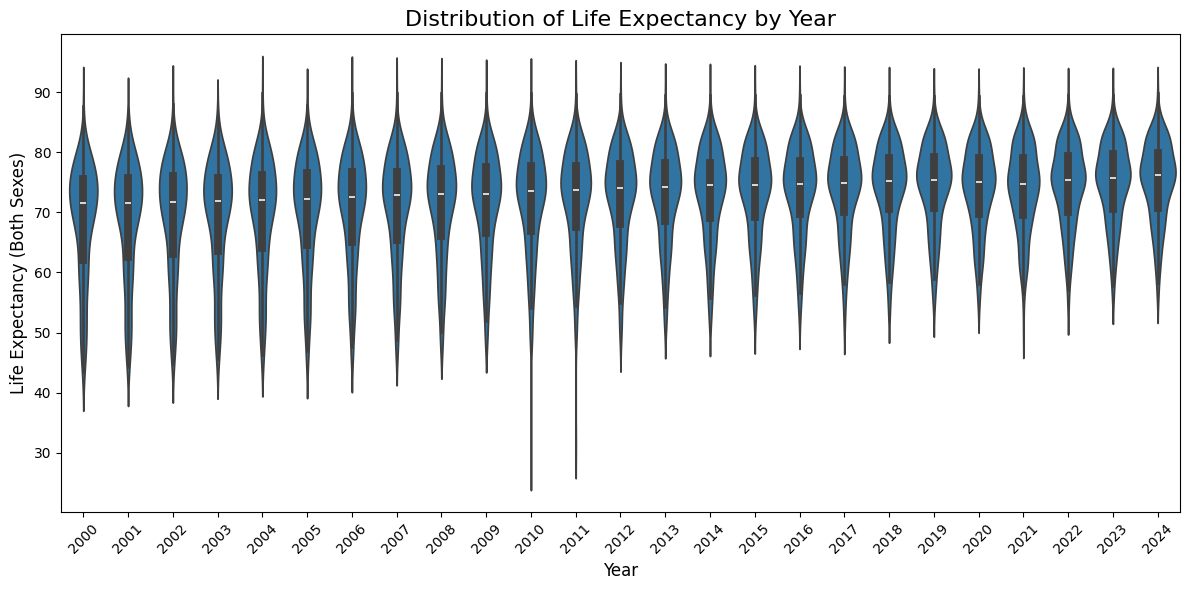

2000's Mean Life Expectancy:68.39
2024's Mean Life Expectancy:75.1


In [49]:
# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating the violin plot
sns.violinplot(data=df, x=df['Year'].astype(int), y='Life Expectancy at Birth, Both Sexes')

# Adding titles and labels to the plot
plt.title('Distribution of Life Expectancy by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Both Sexes)', fontsize=12)

# Rotating the labels
plt.xticks(rotation=45)

# Displaying the plot
plt.tight_layout()
plt.show()

print(f"2000's Mean Life Expectancy:{round((df['Life Expectancy at Birth, Both Sexes'][df['Year']==2000].mean()),2)}")
print(f"2024's Mean Life Expectancy:{round((df['Life Expectancy at Birth, Both Sexes'][df['Year']==2024].mean()),2)}")

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The white lines on the violin plot represent the median life expectancy for each year, showing a subtle upward trend over time. The vertical range of the violins illustrates the distribution and skew of life expectancy in each year, covering all data points. Overall, the data appears consistent, with the obvious exceptions of 2010 and 2011. Taking a closer look at these outliers, below, we can see that Haiti and Somalia had very low life expectancies during 2010 and 2011 respectively. In 2010 Haiti faced a devastating 7.0 earthquake that was catastrophic for the country, and Somalia experienced serious famine and civil war in 2011. More about these events can be read at the following two links:
</div>
    
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Britannica, written by Richard Pallardy
</div>

<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.britannica.com/event/2010-Haiti-earthquake" target="_blank">
    2010 Haiti earthquake (external link)</a>
</div>

<br>


<div style="text-align: center; font-size: 18px; font-family: Georgia;">
International Rescue Committee
</div>
<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.rescue.org/article/why-somalia-facing-catastrophic-famine" target="_blank">
    Somalia Famine (external link)</a>
</div>

<br>
<br>

In [50]:
# Haiti had a massive 7.0 earthquake in 2010 that led to 220,000 - 300,000 deaths and created ongoing issues
# Somolia experienced a great famine and civil war during 2011
print(df[df['Year'] == 2010].loc[df[df['Year'] == 2010]['Life Expectancy at Birth, Both Sexes'].idxmin()])
print()
print(df[df['Year'] == 2011].loc[df[df['Year'] == 2011]['Life Expectancy at Birth, Both Sexes'].idxmin()])

Name                                       Haiti
GENC                                          HT
Year                                      2010.0
Population                               9569827
Annual Growth Rate                         -1.03
Rate of Natural Increase                   -0.54
Population Density                         347.2
Total Fertility Rate                         3.5
Crude Birth Rate                            27.5
Life Expectancy at Birth, Both Sexes        29.6
Infant Mortality Rate, Both Sexes           78.4
Crude Death Rate                            32.9
Net Migration Rate                          -4.8
Births, Both Sexes                      263209.0
Deaths, Both Sexes                      315219.0
Name: 2368, dtype: object

Name                                     Somalia
GENC                                          SO
Year                                      2011.0
Population                              12531295
Annual Growth Rate                        

In [51]:
# Creating a folium map
world_map = folium.Map(location=[0, 0], zoom_start=2,tiles="OpenStreetMap")

# Creating the choropleth layer
Choropleth(
    geo_data='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json',  # GeoJSON data
    data=aggregated_by_country,
    columns=['Name', 'Life Expectancy at Birth, Both Sexes'],  # Match on country names
    key_on='feature.properties.name',      # Use 'name' field from GeoJSON
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Life Expectancy at Birth, Both Sexes'
).add_to(world_map)

# Saving the world map 
world_map.save("world_map_life_expectancy.html")

<div style="text-align: center; font-size: 24px; font-family: Georgia;">
Map of Life Expectancy at Birth
</div>

In [52]:
# Change the src to the github repository location
#<iframe src="maps/world_map_inf_mort.html" width="65%" height="600"></iframe>

# Displaying the map using IFrame
display(IFrame("world_map_life_expectancy.html", width="65%", height="600"))


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The life expectancy at birth map is pretty straight forward, but we do clearly see that the African continent has the lowest average life expectancy at birth. This is to be expected since the correlation between life expectancy and infant mortalities were extremely negative, and the African continent stood out as having high infant mortality rates.
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
That covers our Exploratory Data Analysis for this project. Next we are going into the next stage of the pipeline, hypothesis testing and machine learning models. If you would like some more information on EDA, I have provided some resources to progress your knowledge on the topic further.
</div>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Simpli Learn, Written by Avijeet Biswal
</div>
<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.simplilearn.com/tutorials/data-analytics-tutorial/exploratory-data-analysis" target="_blank">
    What Is Exploratory Data Analysis? (external link)</a>
</div>

<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Geeks for Geeks
</div>
<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/" target="_blank">
    EDA | Exploratory Data Analysis in Python (external link)</a>
</div>

<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Analytics Vidhya, Written by malamahadevan
</div>
<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/" target="_blank">
    Step-by-Step Exploratory Data Analysis (EDA) using Python (external link)</a>
</div>

<br>



---------------------------------------------------------------------------------------
<br>
<a id="ml-models"></a>
<h1 style="font-family: Georgia; font-size: 32px;">Model Engineering</h1>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
In this section of the tutorial, we will build statistical models to further uncover underlying trends that influence human life expectancy. Using the best-performing models, we will also predict future life expectancy into the future. 
    
<br>
<br>

In a real-world scenario, you won't always know with certainty what the best possible model will be. You can take an educated guess at what the best model might be, but you won't always be correct. It's always best to experiment with different models and hyperparameters to determine from a statistical perspective the best model. For this tutorial, we’ll start with a basic multivariate linear regression model and progressively explore more complex models, testing different variations of input data along the way. Let’s get started!
</div>

<br>



<a id="basic_ols"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Basic Multivariate Linear Model</h2>

In [53]:
# Multivariate linear regression for exploratory model building

# Library and function imports
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Removing the categorical data and target variable from our input Matrix
X = df.drop(["Life Expectancy at Birth, Both Sexes",'GENC','Name'], axis=1)
# Adding a bias column of ones to capture the intercepts weights
X = sm.add_constant(X)

# Setting our target feature variable
y = df["Life Expectancy at Birth, Both Sexes"]

# Splitting 2/3 of the data into training data and 1/3 testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=37)

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
We can examine the distribution of our target variable for both the training and testing sets. While a Gaussian distribution for the target variable isn’t a strict requirement for a linear regression model, it’s always useful to check. In our case, the distribution is approximately Gaussian but shows a left skew, with the tail extending to the left. However, this skew won’t impact the input to our models, and we can move forward with linear regression.
</div>

<br>
<br>

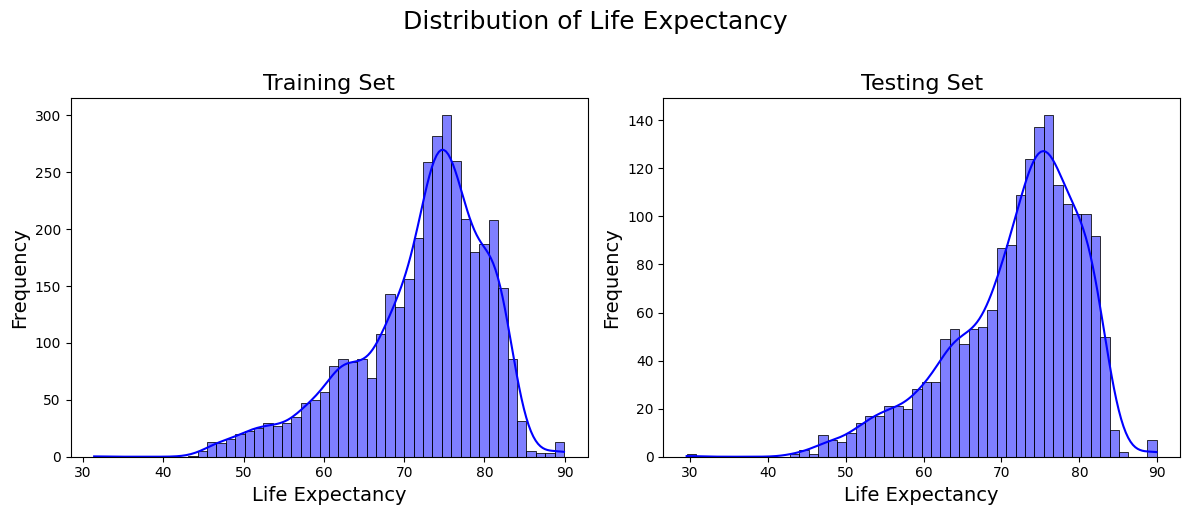

In [54]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Creating a histplot of the training target variable
sns.histplot(y_train, bins=50, kde=True, color="blue", edgecolor="black", ax=axes[0])
axes[0].set_xlabel("Life Expectancy", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].set_title("Training Set", fontsize=16)

# Creating a histplot of the testing target variable
sns.histplot(y_test, bins=50, kde=True, color="blue", edgecolor="black", ax=axes[1])
axes[1].set_xlabel("Life Expectancy", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)
axes[1].set_title("Testing Set", fontsize=16)

# Creating a suptitle
fig.suptitle("Distribution of Life Expectancy", fontsize=18, y=1.02)

# Displaying the plot
plt.tight_layout()
plt.show()

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
We can fit a very basic linear model and check the results by using model.summary().
    <br>
    <br>
    This basic linear model, as seen below, performs extremely well with an R-squared score of 0.916. This means that our basic linear model is explaining 91.6% of the variability in our target variable, life expectancy.  That is a very good result, but we must remember that this is just the training data and we still must check this model with our unseen testing data. 
     <br>
    <br>
   We can see our models final learned weights in the coef column, and it looks like this model is predicting that for every 1 increase in year, life expectancy is increasing by 0.0538 years. Moreover, we can see that "Year", "Population", "Population Density", "Total Fertility Rate", "Infant Mortality Rate, Both Sexes", and "Deaths, Both Sexes" all have p-values less than 0.05, which means they are statistically significant in explaining the variability in the target variable. However, as note 2 states at the bottom of the model summary, we have strong multicollinearity between the features that could be affecting these results. This multicollinearity is a result of the correlation between our independent variables, which we haven't experimented with removing yet.
</div>
<br>
<br>

In [55]:
# Fitting the model
basic_model = sm.OLS(y_train, X_train).fit()

In [56]:
# Retrieving the models results
print(basic_model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Life Expectancy at Birth, Both Sexes   R-squared:                       0.916
Model:                                              OLS   Adj. R-squared:                  0.916
Method:                                   Least Squares   F-statistic:                     3370.
Date:                                  Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                                          20:01:51   Log-Likelihood:                -8463.9
No. Observations:                                  3701   AIC:                         1.695e+04
Df Residuals:                                      3688   BIC:                         1.703e+04
Df Model:                                            12                                         
Covariance Type:                              nonrobust                                         
                              

-----------------------------------------------------------------------

<br>
<a id="assum_ols"></a>
<h3 style="font-family: Georgia; font-size: 28px;">Assumptions of a Linear Model</h3>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
  Let’s now check the assumptions of our linear model. Linear regression models rely on four key assumptions. For this tutorial, I’ve used the assumption definitions provided by Zach Bobbitt on the website <em>Statology</em>. Below, you’ll find the four linear regression assumptions, along with a link to Zach’s article, which provides a more in-depth explanation.
  <ol>
    <li><strong><u>Linear relationship:</u></strong>  <br>  There exists a linear relationship between the independent variable, x, and the dependent variable, y. </li>
      <br>
    <li><strong><u>Normality:</u></strong>  <br>The residuals of the model are normally distributed.</li>
      <br>
    <li><strong><u>Independence:</u></strong> <br>The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.</li>
      <br>
    <li><strong><u>Homoscedasticity:</u></strong> <br>The residuals have constant variance at every level of x.</li>
  </ol>
</div>

<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Statology, Written by Zach Bobbitt
</div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.statology.org/linear-regression-assumptions/" target="_blank">
   The Four Assumptions of Linear Regression (external link)
  </a>
</div>

<br>
<br>

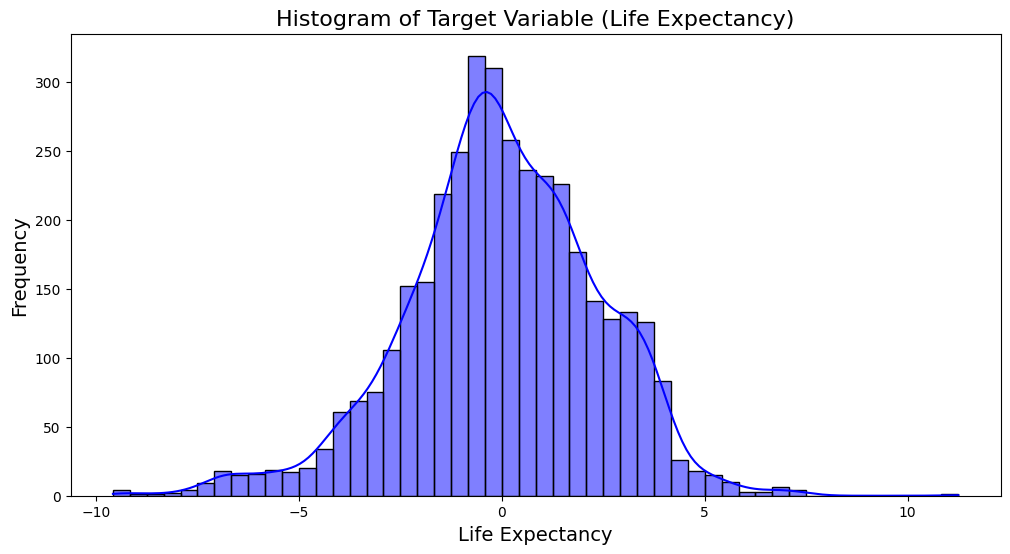

In [57]:
# Getting the models residuals
residuals = basic_model.resid

# setting the figure size
plt.figure(figsize=(12, 6)) 

# Creating a histplot
sns.histplot(residuals, bins=50, kde=True, color="blue", edgecolor="black")

# Setting title and labels
plt.title("Histogram of Target Variable (Life Expectancy)", fontsize=16)
plt.xlabel("Life Expectancy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

#displaying the plot
plt.show()

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The histogram above shows the distribution of our residuals in a well-defined Gaussian curve centered around 0. Although it may not be perfect, this bell-shaped distribution is exactly what we are looking for to satisfy the assumptions of normally distributed variables.
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The next code chunk and the resulting graphs will check all four assumptions of a linear model, replicating the output typically seen in the R programming language when plotting a model. This quad-graph output provides an efficient and comprehensive way to assess the assumptions of a linear model.
</div>
<br>
<br>

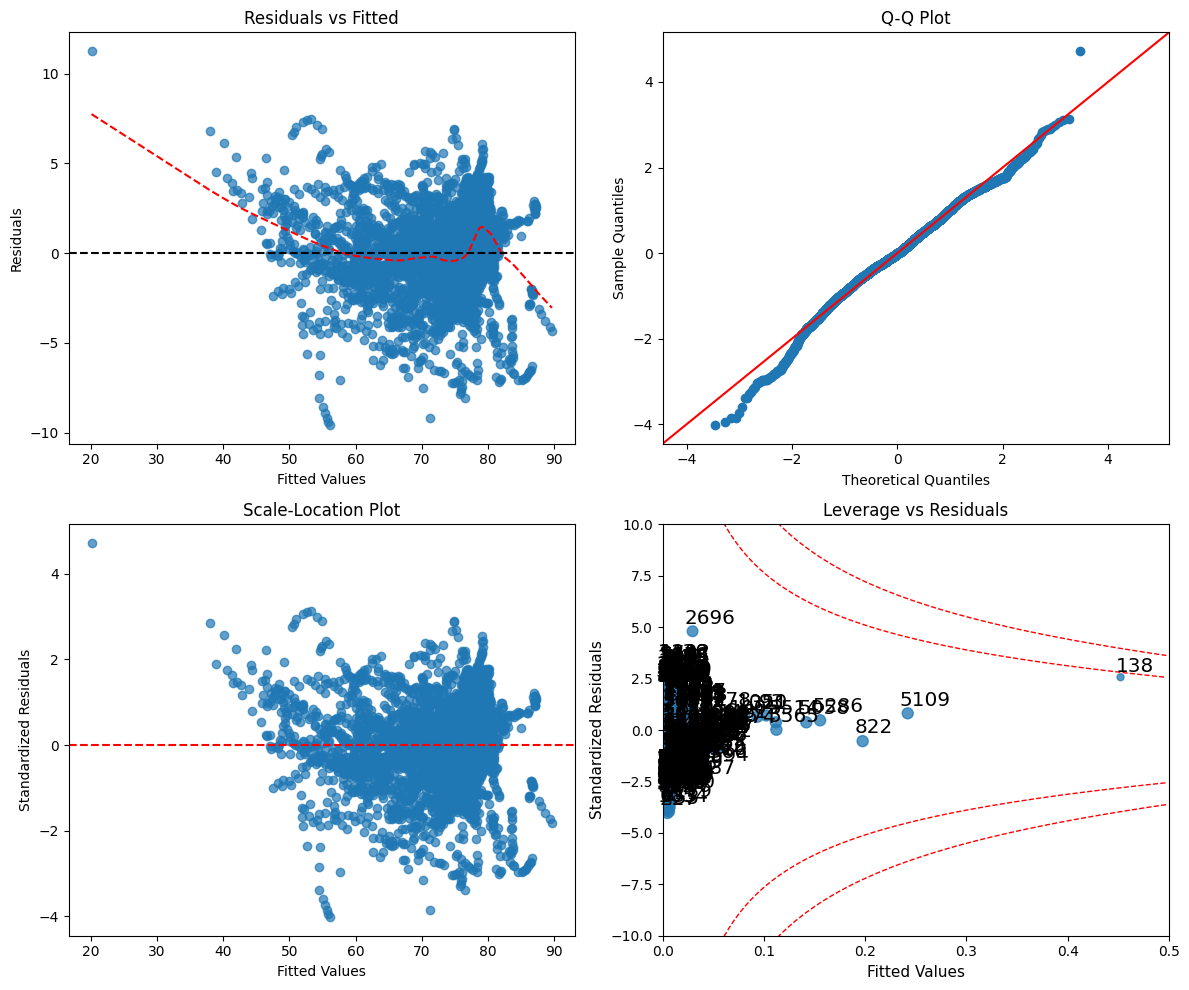

In [58]:
# Creating the subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted Plot
resid = basic_model.resid
fitted = basic_model.fittedvalues
lowess = sm.nonparametric.lowess(resid, fitted, frac=0.3)  
axes[0, 0].scatter(fitted, resid, alpha=0.7)
axes[0, 0].plot(lowess[:, 0], lowess[:, 1], color='red', linestyle='--', linewidth=1.5)  
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# 2. Q-Q Plot
sm.qqplot(basic_model.resid, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 3. Scale-Location Plot (Standardized Residuals vs Fitted Values)
standardized_residuals = basic_model.resid_pearson
axes[1, 0].scatter(basic_model.fittedvalues, standardized_residuals, alpha=0.7)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Standardized Residuals')
axes[1, 0].set_title('Scale-Location Plot')

# 4. Leverage vs Residuals (Cook's Distance)
sm.graphics.influence_plot(basic_model, criterion="cooks", ax=axes[1, 1], size=5)
axes[1, 1].set_title("Leverage vs Residuals")
axes[1, 1].set_xlabel('Fitted Values', size = 11)
axes[1, 1].set_ylabel('Standardized Residuals', size = 11)

# Addding cooks lines
n = basic_model.nobs  
p = basic_model.df_model + 1  
x = np.linspace(0.001, max(basic_model.get_influence().hat_matrix_diag) * 1.1, 100) 
for d in [0.5, 1]:
    y = np.sqrt(d * (p * (1 - x) / x))
    axes[1, 1].plot(x, y, color='red', linestyle='--', lw=1)
    axes[1, 1].plot(x, -y, color='red', linestyle='--', lw=1)

# Setting the plot range
# NOTE: I am manually adjusting these limits. Take caution when doing this yourself.
# Start with no limits and then zoom in until you find an appropriate fit.
axes[1, 1].set_xlim(0, 0.5)
axes[1, 1].set_ylim(-10, 10)

# displaying the plot
plt.tight_layout()
plt.show()

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Let's go over the assumptions of our linear model as shown in the graph above, starting with the top left and ending with the bottom right.
  <ol>
    <li><strong><u>Residuals vs Fitted:</u></strong>  <br> This plot checks two assumptions: linearity and independence. It helps determine whether there is a linear relationship between the response variable and the independent features (predictors) and whether the residuals are independent of each other. Ideally, we expect no visible patterns in this plot, with residuals equally spread around the black dashed line. Additionally, the red dashed line should be as straight as the black dashed line, indicating the absence of obvious patterns or relationships. In this case, it appears that the basic model fails to meet these assumptions of the linear regression model.</li>
      <br>
    <li><strong><u>Q-Q plot:</u></strong>  <br>This plot shows us if the residuals of the model are normally distributed. We expect them to closely follow the red line, which indicates perfect residuals. This is the same check we did above with the histplot when we checked for a Gaussian distribution. This passes the assumption.</li>
      <br>
    <li><strong><u>Scale-Location Plot:</u></strong> <br>The scale location plot checks for homoscedasticity, equal variance of the residuals. It looks very similar to the Residuals vs Fitted plot, but here we are check for an equal spread of points around zero. This plot is currently showing signs of clumping, but it appears to be primarily due to one outlier on the far left of the plot. I wouldn't call this assumption an instant fail, but it could be better.</li>
      <br>
    <li><strong><u>Leverage vs Residuals:</u></strong> <br>This plot is used to analyze Cook's distance, a metric that identifies outliers strongly affecting the model.  If any points fall outside of the red lines, then they are greatly affecting the models results.  The point labeled 138 (df row 138) is close to the line, but is still within. Everything passes here.</li>
  </ol>
</div>

<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Check out this article by Bommae Kim on the University of Virginia Library website for more details about these assumption plots. 
</div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://library.virginia.edu/data/articles/diagnostic-plots" target="_blank">
   Understanding Diagnostic Plots for Linear Regression Analysis (external link)
  </a>
</div>


<br>
<br>
<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Although it failed the assumptions of the linear model, let's check the test data.
</div>

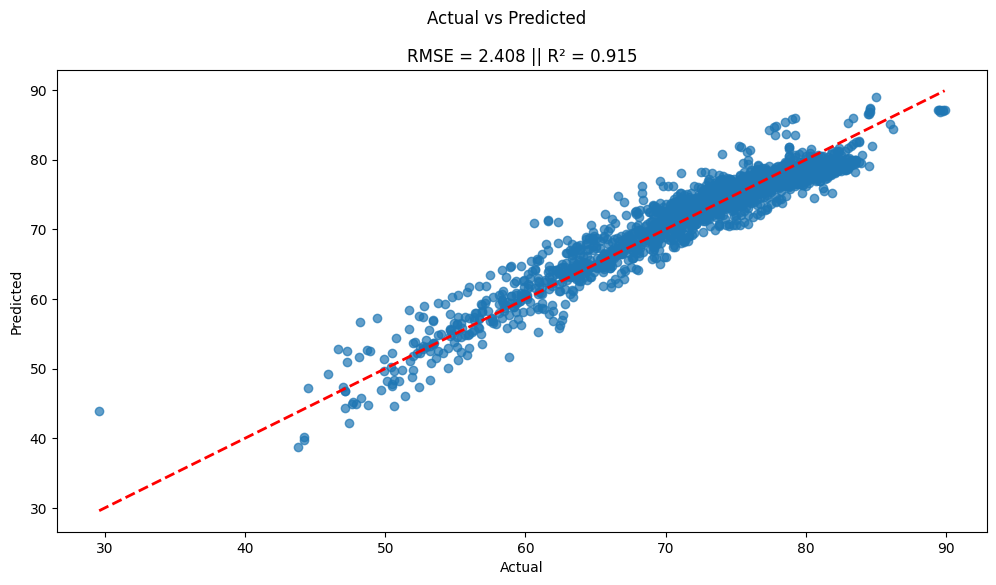

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# setting the figure size
plt.figure(figsize=(12, 6))  

# Making new predictions from our feature test matrix
y_pred = basic_model.predict(X_test)

# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculating R^2 (Goodness of fit)
r2 = r2_score(y_test, y_pred)

# Plotting the results
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle('Actual vs Predicted')
plt.title(f'RMSE = {rmse:.3f} || R² = {r2:.3f}')
plt.show()


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The test data actually performed very well, with an R^2 of 91.5% variability explained, even with one failed assumption. It appears even though the residuals were displaying signs of non-indpendence, the model still perfoms well on unseen data. The failed assumption would be enough for me to seek out alternative models, however.  
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The next model we are going to build will test interactions between the predictor variables.  This will enable us to capture relationships between the features that otherwise may not be captured.
</div>
<br>

---------------------------------------------------------

<br>
<a id="poly_reg"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Polynomial Regression Model</h2>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The Polynomial Regression Model captures higher-order terms by creating interactions between variables. You can control the complexity of the model by tuning the “degree” parameter in PolynomialFeatures(). Increasing the degree adds more complexity and allows the model to fit more intricate patterns in the data. The workflow for this model will follow the same process as the linear regression example above, so review the code to learn more about how polynomial regression works.
</div>

In [60]:
from sklearn.preprocessing import PolynomialFeatures

# fitting Polynomial Features (degree=2 interactions) (bias already included in X)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fitting the interactions
X_interaction = poly.fit_transform(X_train)

# getting the feature names for interaction terms
interaction_feature_names = poly.get_feature_names_out(X_train.columns)

# convervting to a dataframe
X_interaction_df = pd.DataFrame(X_interaction, columns=interaction_feature_names, index=X_train.index)

# Fiting the linear regression model with interaction terms
poly_model = sm.OLS(y_train,X_interaction_df).fit()

# Model summary
print(poly_model.summary())


                                     OLS Regression Results                                     
Dep. Variable:     Life Expectancy at Birth, Both Sexes   R-squared:                       0.951
Model:                                              OLS   Adj. R-squared:                  0.950
Method:                                   Least Squares   F-statistic:                     1434.
Date:                                  Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                                          20:02:13   Log-Likelihood:                -7491.1
No. Observations:                                  3701   AIC:                         1.508e+04
Df Residuals:                                      3651   BIC:                         1.539e+04
Df Model:                                            49                                         
Covariance Type:                              nonrobust                                         
                              

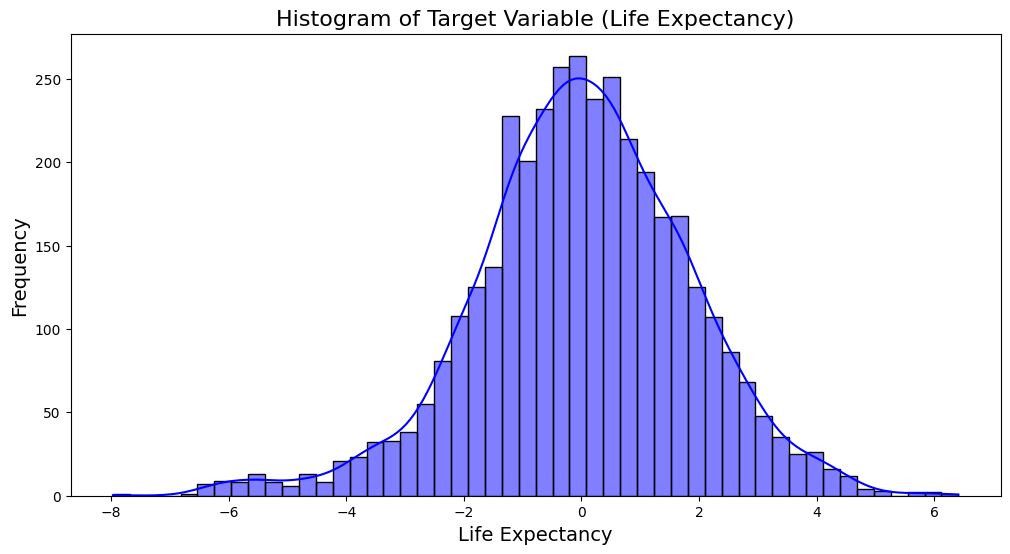

In [61]:
# getting the model residuals
residuals = poly_model.resid

# setting the figure size
plt.figure(figsize=(12, 6))  

# plotting the residuals
sns.histplot(residuals, bins=50, kde=True, color="blue", edgecolor="black")

# decorating the plot
plt.title("Histogram of Target Variable (Life Expectancy)", fontsize=16)
plt.xlabel("Life Expectancy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Showing the plot
plt.show()

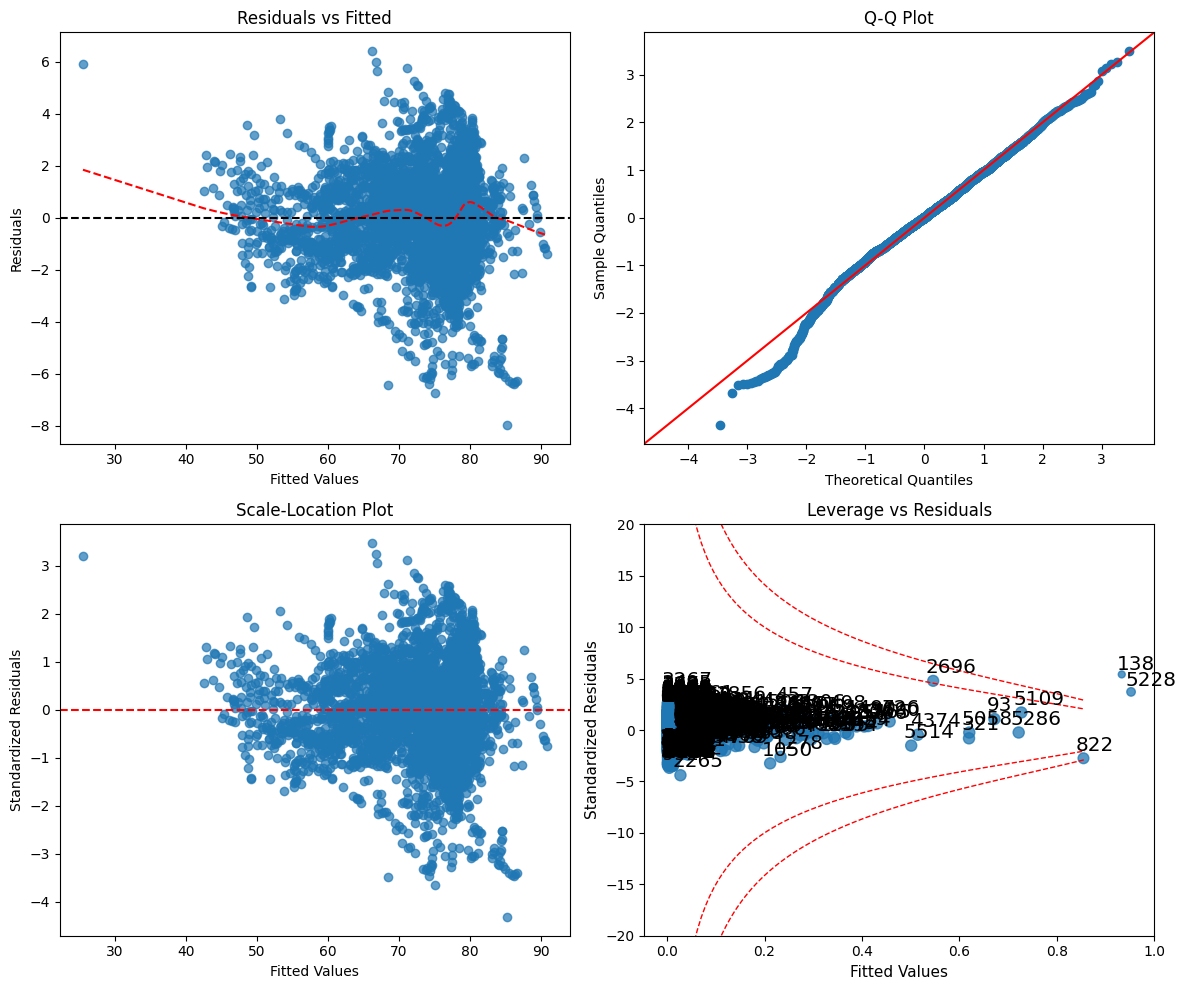

In [62]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted Plot
resid = poly_model.resid
fitted = poly_model.fittedvalues
lowess = sm.nonparametric.lowess(resid, fitted, frac=0.3)  
axes[0, 0].scatter(fitted, resid, alpha=0.7)
axes[0, 0].plot(lowess[:, 0], lowess[:, 1], color='red', linestyle='--', linewidth=1.5)  
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# 2. Q-Q Plot
sm.qqplot(poly_model.resid, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 3. Scale-Location Plot (Standardized Residuals vs Fitted Values)
standardized_residuals = poly_model.resid_pearson
axes[1, 0].scatter(poly_model.fittedvalues, standardized_residuals, alpha=0.7)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Standardized Residuals')
axes[1, 0].set_title('Scale-Location Plot')

# Leverage vs Residuals (Cook's Distance)
sm.graphics.influence_plot(poly_model, criterion="cooks", ax=axes[1, 1], size=5)
axes[1, 1].set_title("Leverage vs Residuals")
axes[1, 1].set_xlabel('Fitted Values', size=11)
axes[1, 1].set_ylabel('Standardized Residuals', size=11)

# Adding Cook's Distance lines
n = poly_model.nobs
p = poly_model.df_model + 1
x = np.linspace(0.001, max(poly_model.get_influence().hat_matrix_diag) * 0.9, 100) 
for d in [0.5, 1]:
    y = np.sqrt(np.maximum(0, d * (p * (1 - x) / x)))  
    axes[1, 1].plot(x, y, color='red', linestyle='--', lw=1)
    axes[1, 1].plot(x, -y, color='red', linestyle='--', lw=1)

# Setting the plot range for cooks distance
# NOTE: I am manually adjusting these limits. Take caution when doing this yourself.
# Start with no limits and then zoom in until you find an appropriate fit.
#axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(-20, 20)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plots
plt.show()


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
These assumptions for the polynomial model look much better! The Leverage vs Residuals plot has identified some points that are pulling the model and can possibly affect the models coefficients, but it's no strictly speaking an assumption of a linear model.  Let's check how the model score on the testing data.
</div>

<br>
<br>

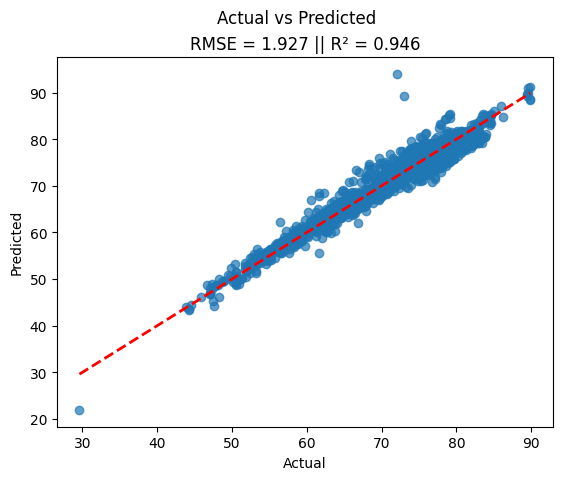

In [63]:
# Creating the same interaction terms as X_train
X_test_interaction = poly.transform(X_test)

# converting to a dataframe
X_test_interaction_df = pd.DataFrame(X_test_interaction, columns=interaction_feature_names, index=X_test.index)

# generating our predictions
y_pred = poly_model.predict(X_test_interaction_df)

# calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# calculating R^2 (goodness of fit)
r2 = r2_score(y_test, y_pred)

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle('Actual vs Predicted')
plt.title(f'RMSE = {rmse:.3f} || R² = {r2:.3f}')
plt.show()

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The degree 2 Polynomial Model scored better than the basic linear model with 94.6% variability explained.  The assumptions of the linear model also did much better, and I would consider them a pass.
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Let's keep exploring models! Next, let's remove the multicollinearity from our data and see if we get even more impressive results.
</div>

<br>
<br>

------------------------------------------------------------------------------

<br>
<a id="no_mc"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Linear Regression Model without Multicollinearity</h2>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
For this linear regression model, we are going to take the same approach as the basic model, but we are going to remove the features that are causing high multicollinearity.  We can check our feature set's multicollinearity by checking the feature's variance inflation factor. We will iteratively remove the high VIF features one at a time until all VIF's are under 10, a "reasonable" VIF value. You can adjust this hyperparameter as much as you like, and test models with different VIF values, but a VIF of 10 is what we are using here.
</div>

<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
For more information on variance inflation factors, check out this article by Data Camp's Vikash Singh linked below.
</div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.datacamp.com/tutorial/variance-inflation-factor" target="_blank">
   Variance Inflation Factor (VIF): Addressing Multicollinearity in Regression Analysis (external link)
  </a>
</div>


<br>
<br>

In [64]:
# Checking Multicollinearity to see if its effecting high R^2 values
from statsmodels.stats.outliers_influence import variance_inflation_factor

# initializing a dataframe
vif = pd.DataFrame()
# Looping through X features and getting VIF Values.
# X was set at the beginning of Model Engineering section
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] = X.columns
print(vif)

              VIF                            Feature
0    82213.776390                              const
1        1.053007                               Year
2       40.086780                         Population
3   492313.820258                 Annual Growth Rate
4    70276.225018           Rate of Natural Increase
5        1.043891                 Population Density
6       30.122885               Total Fertility Rate
7    51713.386889                   Crude Birth Rate
8        6.144328  Infant Mortality Rate, Both Sexes
9     4239.957737                   Crude Death Rate
10  450795.403283                 Net Migration Rate
11       9.376623                 Births, Both Sexes
12      37.637937                 Deaths, Both Sexes


In [65]:
# Creating a function to drop high VIF values one at a time.
def drop_high_vif(X, vif_value=10):
    while True:
        vif = pd.DataFrame()
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif["Feature"] = X.columns
        max_vif = vif["VIF"].max()
        if max_vif < vif_value:
            # Stop if all VIF values are below the threshold
            break   
        # Drop the feature with the highest VIF
        feature_to_drop = vif.loc[vif["VIF"].idxmax(), "Feature"]
        print(f"Dropping feature: {feature_to_drop} with VIF: {max_vif}")
        X = X.drop(columns=[feature_to_drop])
    return X

X_no_mc = drop_high_vif(X)

Dropping feature: Annual Growth Rate with VIF: 492313.8202576999
Dropping feature: const with VIF: 82211.8045721277
Dropping feature: Crude Birth Rate with VIF: 211355.81499620437
Dropping feature: Total Fertility Rate with VIF: 135.9581097188382
Dropping feature: Population with VIF: 42.24213180558822
Dropping feature: Year with VIF: 19.070216948041374


In [66]:
# Printing our new VIF values
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_no_mc.values, i) for i in range(X_no_mc.shape[1])]
vif["Feature"] = X_no_mc.columns
print(vif)

        VIF                            Feature
0  4.951165           Rate of Natural Increase
1  1.048942                 Population Density
2  6.417025  Infant Mortality Rate, Both Sexes
3  2.622324                   Crude Death Rate
4  1.001691                 Net Migration Rate
5  9.167904                 Births, Both Sexes
6  8.934938                 Deaths, Both Sexes


In [67]:
# Adding the bias term for capturing the intercepts theta
X_no_mc = sm.add_constant(X_no_mc)
y = df["Life Expectancy at Birth, Both Sexes"]

# Using the same split as the previous models with rs 37
X_train_no_mc, X_test_no_mc, y_train_no_mc, y_test_no_mc = train_test_split(
    X_no_mc, y, test_size=0.33, random_state=37)

# Training the model
no_mc_model = sm.OLS(y_train_no_mc, X_train_no_mc).fit()

In [68]:
# Printing the model sumamry
print(no_mc_model.summary())

                                     OLS Regression Results                                     
Dep. Variable:     Life Expectancy at Birth, Both Sexes   R-squared:                       0.884
Model:                                              OLS   Adj. R-squared:                  0.884
Method:                                   Least Squares   F-statistic:                     4031.
Date:                                  Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                                          20:06:17   Log-Likelihood:                -9066.2
No. Observations:                                  3701   AIC:                         1.815e+04
Df Residuals:                                      3693   BIC:                         1.820e+04
Df Model:                                             7                                         
Covariance Type:                              nonrobust                                         
                              

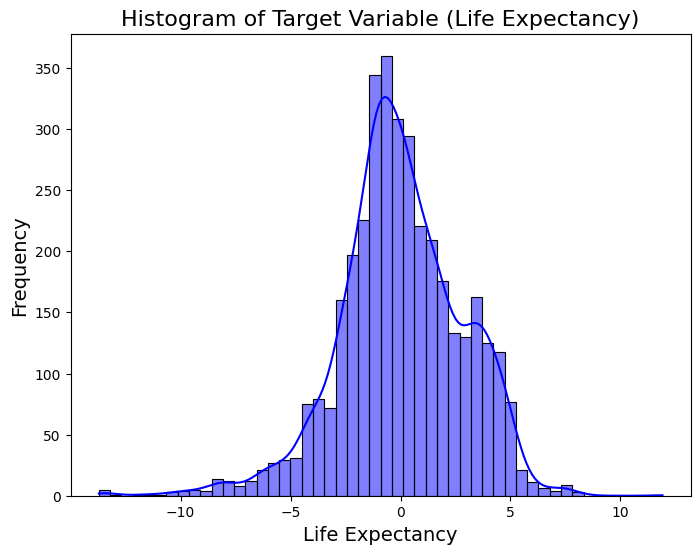

In [69]:
# Gathering the residuals
residuals = no_mc_model.resid
# Setting the figure size
plt.figure(figsize=(8, 6))  
# Creating the histogram to check for residual normality
sns.histplot(residuals, bins=50, kde=True, color="blue", edgecolor="black")
# decorating the plot
plt.title("Histogram of Target Variable (Life Expectancy)", fontsize=16)
plt.xlabel("Life Expectancy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
# showing the plot
plt.show()

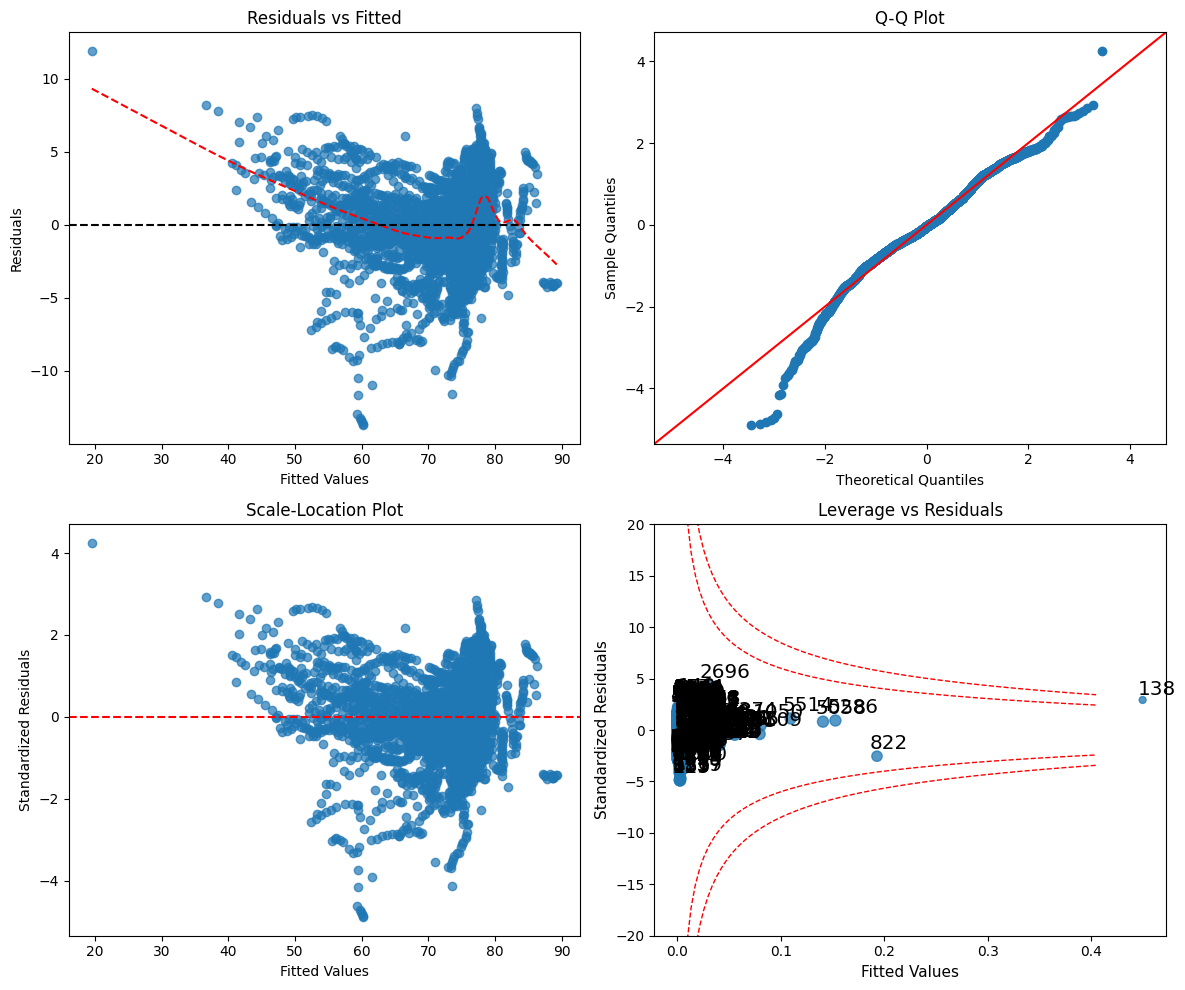

In [70]:
# creating the grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted Plot
resid = no_mc_model.resid
fitted = no_mc_model.fittedvalues
lowess = sm.nonparametric.lowess(resid, fitted, frac=0.3)  
axes[0, 0].scatter(fitted, resid, alpha=0.7)
axes[0, 0].plot(lowess[:, 0], lowess[:, 1], color='red', linestyle='--', linewidth=1.5)  
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# 2. Q-Q Plot
sm.qqplot(no_mc_model.resid, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 3. Scale-Location Plot (Standardized Residuals vs Fitted Values)
standardized_residuals = no_mc_model.resid_pearson
axes[1, 0].scatter(no_mc_model.fittedvalues, standardized_residuals, alpha=0.7)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Standardized Residuals')
axes[1, 0].set_title('Scale-Location Plot')

# 4. Leverage vs Residuals (Cook's Distance)
sm.graphics.influence_plot(no_mc_model, criterion="cooks", ax=axes[1, 1], size=5)
axes[1, 1].set_title("Leverage vs Residuals")
axes[1, 1].set_xlabel('Fitted Values', size=11)
axes[1, 1].set_ylabel('Standardized Residuals', size=11)

# Adding Cook's Distance lines
n = no_mc_model.nobs
p = no_mc_model.df_model + 1
x = np.linspace(0.001, max(no_mc_model.get_influence().hat_matrix_diag) * 0.9, 100) 
for d in [0.5, 1]:
    y = np.sqrt(np.maximum(0, d * (p * (1 - x) / x)))  
    axes[1, 1].plot(x, y, color='red', linestyle='--', lw=1)
    axes[1, 1].plot(x, -y, color='red', linestyle='--', lw=1)

# Setting the plot range for cooks distance
# NOTE: I am manually adjusting these limits. Take caution when doing this yourself.
# Start with no limits and then zoom in until you find an appropriate fit.
#axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(-20, 20)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plots
plt.show()

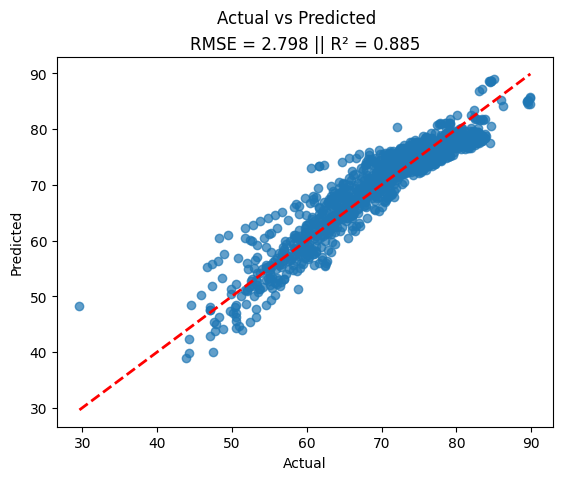

In [71]:
# creating the y-hat predictions
y_pred = no_mc_model.predict(X_test_no_mc)

# calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test_no_mc, y_pred))

# calculating R^2 score
r2 = r2_score(y_test_no_mc, y_pred)

# creating the residual prediction score plot
plt.scatter(y_test_no_mc, y_pred, alpha=0.7)
plt.plot([y_test_no_mc.min(), y_test_no_mc.max()], [y_test_no_mc.min(), y_test_no_mc.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle('Actual vs Predicted')
plt.title(f'RMSE = {rmse:.3f} || R² = {r2:.3f}')
plt.show()


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Removing multicollinearity from the model resulted in an R-squared score of just 0.885 on the test data, making it the worst performing model on the unseen test data so far. But why exactly was the R-squared lower than the models with multicollinearity? If multicollinearity is problematic, why did the model perform worse on unseen data after removing high VIF features? <br><br>
Chetna Khanna, in her article 'Multicollinearity — Why is it bad?' on Towards Data Science, provides insight into this question. She explains the following:

</div>

<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
"In short, multicollinearity is a problem for causal inference or creates difficulties in casual inference but it is not a problem for prediction or forecasting."
</div>

<br>


<div style="text-align: center; font-size: 18px; font-family: Georgia;">
See Chetna Khanna's article linked here:
</div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://towardsdatascience.com/multicollinearity-why-is-it-bad-5335030651bf" target="_blank">
  Multicollinearity — Why is it bad? (external link)
  </a>
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
This means that although multicollinearity may not affect model performace, it makes the individual feature results untrustworthy. These individual feature results in reference are the coef and significance values (p-values) that tell us more about the features effects on the target variable. If the goal of your project is to determine the significance of predictors on the target variable, then handling multicollinearity is essential. <br><br>In our case, removing the multicollinearity removed some underlying relationships and essentially decreased our predictive power.  Whether to address multicollinearity all depends on the goal you are trying to achieve.

</div>

<br>
<br>

----------------------------------------------------------

<br>
<a id="lin_scale"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Polynomial Linear Regression with Scaled Features</h2>

<br>


<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Scaling the predictors before feeding them into a model is an effective way to handle differences in feature scales. For example, in our dataset, some values are measured per 1,000 people, while others are raw counts. Scaling the input matrix before passing it to the model is often essential for achieving optimal results. Our results have been strong so far, but let’s see if scaling the data can further enhance our predictive power!

</div>

<br>
<br>


In [72]:
from sklearn.preprocessing import StandardScaler

# Removing the bias so it doesnt get scaled, we still want bias to be ones.
X_train_no_const = X_train.drop(columns=["const"])
X_test_no_const = X_test.drop("const", axis=1)

# Scaling the features
scaler_poly = StandardScaler()
X_train_scaled =scaler_poly.fit_transform(X_train_no_const)
X_test_scaled = scaler_poly.transform(X_test_no_const)

# converting the scaled arrarys into dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_no_const.columns, index=X_train_no_const.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_no_const.columns, index=X_test_no_const.index)

# adding the constant back in as ones
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# creating the feature interactions(degree=2 interactions, bias already included in X)
poly_scale = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly_scale.fit_transform(X_train_scaled)

# gathering the interaction terms
interaction_feature_names = poly_scale.get_feature_names_out(X_train_scaled.columns)

# creating the interaction dataframe
X_interaction_df = pd.DataFrame(X_interaction, columns=interaction_feature_names, index=X_train_scaled.index)

# Fit the linear regression model with interaction terms
scaled_poly_model = sm.OLS(y_train, X_interaction_df).fit()

# Print the summary of the model
print(scaled_poly_model.summary())


                                     OLS Regression Results                                     
Dep. Variable:     Life Expectancy at Birth, Both Sexes   R-squared:                       0.959
Model:                                              OLS   Adj. R-squared:                  0.959
Method:                                   Least Squares   F-statistic:                     1099.
Date:                                  Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                                          20:06:28   Log-Likelihood:                -7126.0
No. Observations:                                  3701   AIC:                         1.441e+04
Df Residuals:                                      3622   BIC:                         1.490e+04
Df Model:                                            78                                         
Covariance Type:                              nonrobust                                         
                              

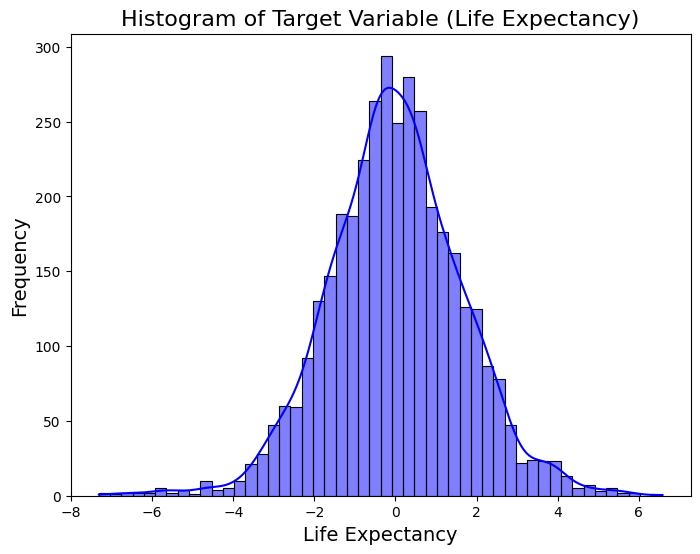

In [73]:
# gathering the residuals
residuals = scaled_poly_model.resid

# Setting the plot size
plt.figure(figsize=(8, 6))  

# Creating and showing the plot
sns.histplot(residuals, bins=50, kde=True, color="blue", edgecolor="black")
plt.title("Histogram of Target Variable (Life Expectancy)", fontsize=16)
plt.xlabel("Life Expectancy", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

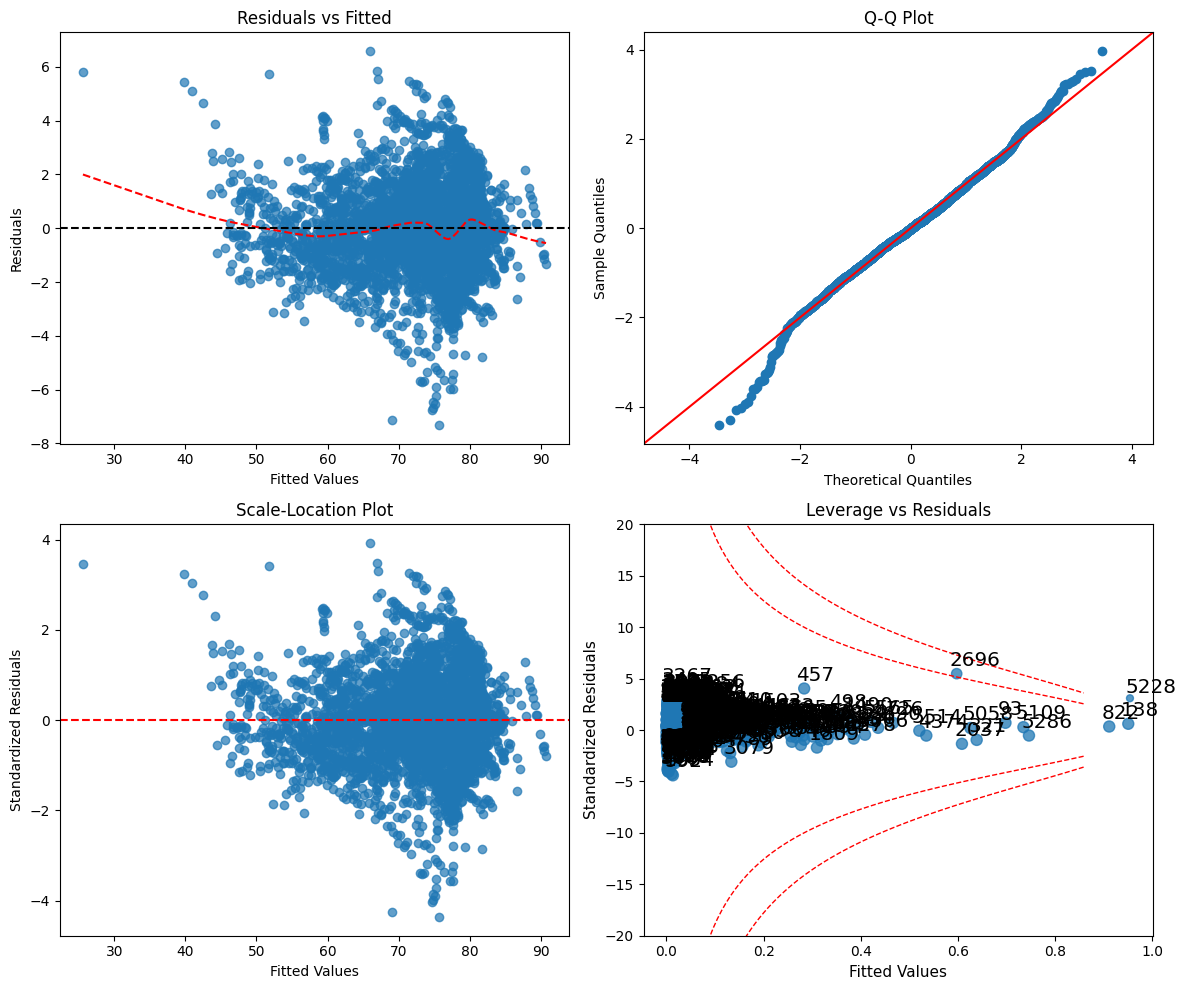

In [74]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Residuals vs Fitted Plot
resid = scaled_poly_model.resid
fitted = scaled_poly_model.fittedvalues
lowess = sm.nonparametric.lowess(resid, fitted, frac=0.3)  
axes[0, 0].scatter(fitted, resid, alpha=0.7)
axes[0, 0].plot(lowess[:, 0], lowess[:, 1], color='red', linestyle='--', linewidth=1.5)  
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')

# 2. Q-Q Plot
sm.qqplot(scaled_poly_model.resid, line='45', fit=True, ax=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# 3. Scale-Location Plot (Standardized Residuals vs Fitted Values)
standardized_residuals = scaled_poly_model.resid_pearson
axes[1, 0].scatter(scaled_poly_model.fittedvalues, standardized_residuals, alpha=0.7)
axes[1, 0].axhline(0, color='red', linestyle='--')
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('Standardized Residuals')
axes[1, 0].set_title('Scale-Location Plot')

# 4. Leverage vs Residuals (Cook's Distance)
sm.graphics.influence_plot(scaled_poly_model, criterion="cooks", ax=axes[1, 1], size=5)
axes[1, 1].set_title("Leverage vs Residuals")
axes[1, 1].set_xlabel('Fitted Values', size=11)
axes[1, 1].set_ylabel('Standardized Residuals', size=11)

# Adding Cook's Distance lines
n = scaled_poly_model.nobs
p = scaled_poly_model.df_model + 1
x = np.linspace(0.001, max(scaled_poly_model.get_influence().hat_matrix_diag) * 0.9, 100) 
for d in [0.5, 1]:
    y = np.sqrt(np.maximum(0, d * (p * (1 - x) / x)))  
    axes[1, 1].plot(x, y, color='red', linestyle='--', lw=1)
    axes[1, 1].plot(x, -y, color='red', linestyle='--', lw=1)

# Setting the plot range for cooks distance
# NOTE: I am manually adjusting these limits. Take caution when doing this yourself.
# Start with no limits and then zoom in until you find an appropriate fit.
#axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(-20, 20)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plots
plt.show()

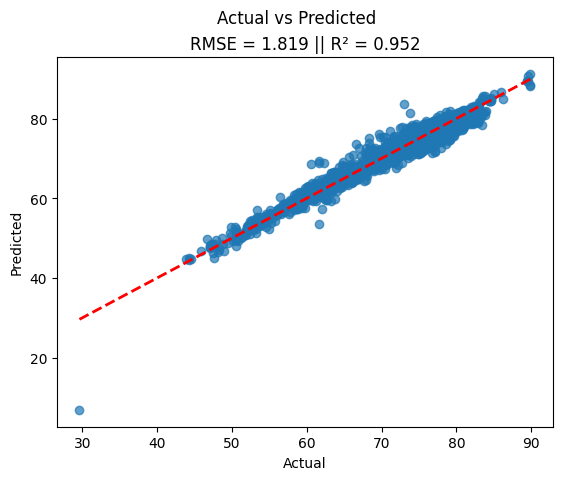

In [75]:
# Apply the same polynomial interaction transformation to the test set
X_test_interaction = poly_scale.transform(X_test_scaled)
interaction_feature_names = poly_scale.get_feature_names_out(X_test_scaled.columns)

# Convert back to DataFrame with the same feature names
X_test_interaction_df = pd.DataFrame(X_test_interaction, columns=interaction_feature_names, index=X_test_scaled.index)

# Make predictions on the test set
y_pred = scaled_poly_model.predict(X_test_interaction_df)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R^2
r2 = r2_score(y_test, y_pred)

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle('Actual vs Predicted')
plt.title(f'RMSE = {rmse:.3f} || R² = {r2:.3f}')
plt.show()

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Scaling the predictors produced the most powerful predictive model yet with an explained variability in the target variable of 95.2%, while also looking pretty good on the assumptions of a linear model.

</div>
<br><br>

------------------------------------------------------------------------

<br>
<a id="scale_cv"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Scaled Polynomial Cross-Validation Score</h2>

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The methods we’ve used so far to create models involve fitting a single training set and testing it on a single testing set. While this approach isn’t necessarily flawed, it doesn’t always provide the most reliable indication of how a model will perform on unseen data. To obtain a better measure of model performance, we can use cross-validation, which provides a more accurate estimate of our predictive power. Let's use the same model we just created, but use cross-validation to get a better approximation of our predictive power.
</div>

<br>
<br>
<div style="text-align: center; font-size: 18px; font-family: Georgia;">
For a more in-depth explanation of cross-validation and its Python implementation, see this article hosted on <em>Geeks for Geeks</em>:
</div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.geeksforgeeks.org/cross-validation-machine-learning/" target="_blank">
  Cross Validation in Machine Learning (external link)
  </a>
</div>

<br>
<br>
<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The code chunk below defines a custom cross-validation function,"cv_scores", designed to evaluate the performance of our scaled polynomial regression model with interaction terms.
</div>

In [76]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold

# Creating a function to implement cv on scaled data for a polynomial linear model of degree 2
def cv_scores(X, y, degree=2, folds=10):
    kf = KFold(n_splits=folds, shuffle=True, random_state=3)  

    # initializing empty lists for scores
    rmse_scores = []
    r2_scores = []

    # looping over the k-folds
    for train_index, val_index in kf.split(X):
       # Gathing the training data based on the current folds indicies
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Removing the bias so it doesnt get scaled, we still want bias to be ones.
        X_train_no_const = X_train.drop(columns=["const"])
        X_val_no_const = X_val.drop("const", axis=1)

        # scaling the current fold
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_no_const)
        X_val_scaled = scaler.transform(X_val_no_const)
        
        # converting the scaled data back to a dataframe
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_no_const.columns, index=X_train_no_const.index)
        X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val_no_const.columns, index=X_val_no_const.index)

        # adding the bias term back
        X_train_with_const = sm.add_constant(X_train_scaled)
        X_val_with_const = sm.add_constant(X_val_scaled)

        # Creating the interactions
        poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
        X_train_poly = poly.fit_transform(X_train_with_const)
        X_val_poly = poly.transform(X_val_with_const)

        # converting the interactions back into a df
        interaction_feature_names = poly.get_feature_names_out(X_train_with_const.columns)
        X_train_poly_df = pd.DataFrame(X_train_poly, columns=interaction_feature_names, index=X_train_with_const.index)
        X_val_poly_df = pd.DataFrame(X_val_poly, columns=interaction_feature_names, index=X_val_with_const.index)

        # fitting the model
        cv_poly_scaled_model = sm.OLS(y_train, X_train_poly_df).fit()

        # making the predictions
        y_val_pred = cv_poly_scaled_model.predict(X_val_poly_df)

        # Calculate the RMSE and R^2 for the current fold and adding them to the scores list
        rmse_scores.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
        r2_scores.append(r2_score(y_val, y_val_pred))

    # Returning the mean rmse score and r^2 score
    return np.mean(rmse_scores), np.mean(r2_scores)

# Using our cv function to get the mean rmse and r^2 from our 10 folds
rmse, r2 = cv_scores(X_train, y_train, degree=2, folds=10)

print(f"Cross-Validated RMSE: {rmse:.3f}")
print(f"Cross-Validated R²: {r2:.3f}")

Cross-Validated RMSE: 1.981
Cross-Validated R²: 0.931


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The scores from cross-validation are slightly lower, as expected when using this method. Cross-validation metrics provide more reliable estimates of model accuracy on unseen data, making them a trustworthy benchmark. With that being said, achieving an R² of 0.931, or 93.1% explained variability is fantastic and indicates that this is a strong model.
</div>

<br>
<br>

-----------------------------------------------------------

<br>
<a id="ridge_reg"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Ridge & Lasso Reggression</h2>

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Ridge and Lasso Regression are extensions of Ordinary Least Squares (OLS) that incorporates a regularization term to enhance model performance. Ridge Regression helps control the impact of outliers by shrinking large coefficients, while Lasso not only regularizes but also performs feature selection by shrinking some coefficients to zero. These techniques refine linear models and often lead to more robust and reliable results.   
</div>


<br>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Ridge Regression:  <br> <ol>
    <li>Shrinks large coefficients by applying an L2 regularization penalty (the sum of squared coefficients).</li>
    <li>All features remain in the model; no coefficients are reduced to zero.</li>
    <li>Helps prevent overfitting, especially when features are correlated or have large magnitudes.</li>
  </ol>
        
</div>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Lasso Regression:  <br> <ol>
    <li>Uses an L1 regularization penalty (the sum of the absolute values of coefficients).</li>
    <li>Can shrink some coefficients to exactly zero, effectively removing irrelevant features from the model.</li>
    <li>Performs feature selection in addition to regularization, making it ideal for high-dimensional datasets with many irrelevant predictors.</li>
  </ol>
        
</div>
<br>
<br>

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
This article from Aarshay Jain on <em>Analytics Vidhya</em> provides an excellent explanation and walk-through of these two methods:
</div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/" target="_blank">
  Ridge and Lasso Regression in Python (external link)
  </a>
</div>

<br>
<br>

In [77]:
# Importing ridge
from sklearn.linear_model import Ridge

# Removing the bias so it doesnt get scaled, we still want bias to be ones.
X_train_no_const = X_train.drop(columns=["const"])
X_test_no_const = X_test.drop("const", axis=1)

# Ridge regession works best with scaled data
scaler_rl = StandardScaler()
X_train_scaled = scaler_rl.fit_transform(X_train_no_const)
X_test_scaled = scaler_rl.transform(X_test_no_const)

# adding the bias column back in after scaling
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# fitting Ridge regression with a random alpha
ridge = Ridge(alpha=10.0, solver="auto")
ridge.fit(X_train_scaled, y_train)

# making predictions
y_test_pred = ridge.predict(X_test_scaled)

# evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

# printing the scores
print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.3f}")

Test RMSE: 2.416
Test R²: 0.914


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
An R² of 0.914 isn't the best score we've seen, but if you notice in the code above, we just picked a random alpha value for our regularization term. There are more appropriate ways to choose the alpha we use, such as demonstrated in the following code chunk using Grid Search.
</div>

<br>
<br>

In [78]:
#importing grid search
from sklearn.model_selection import GridSearchCV

# Creating a list of alpha values to check in our grid search
param_grid = {'alpha': np.arange(0.1, 100.5, 0.1)}

# Searching for the best alpha value
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=10, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

# Printing the best alpha and score
print(f"Best alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best RMSE score: {round(np.sqrt(-ridge_cv.best_score_),3)}")


Best alpha: 0.5
Best RMSE score: 2.395


In [79]:
# Fit Ridge regression with the optimal alpha
ridge = Ridge(alpha=0.5, solver="auto")
ridge.fit(X_train_scaled, y_train)

# predicting y-hat
y_test_pred = ridge.predict(X_test_scaled)

# Checking the models scores
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test R²: {r2:.3f}")

Test RMSE: 2.408
Test R²: 0.915


In [80]:
# Checking the feature importance decided by Ridge Regression
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge.coef_
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance.reset_index(drop=True))


                              Feature  Coefficient
0                Total Fertility Rate     7.492922
1                  Net Migration Rate     1.006639
2                          Population     0.701532
3                  Population Density     0.645700
4                                Year     0.389827
5                  Births, Both Sexes     0.133352
6                               const     0.000000
7                  Deaths, Both Sexes    -0.931505
8                  Annual Growth Rate    -1.017386
9                    Crude Death Rate    -3.444583
10  Infant Mortality Rate, Both Sexes    -3.733471
11           Rate of Natural Increase    -4.295023
12                   Crude Birth Rate    -5.921974


<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Using Grid Search to find the optimal alpha value of 0.5, only increased our model slightly to an R² of 0.915. The above code chunk also shows the feature importance determined by the Ridge model.
</div>

<br>
<br>
<br>
<br>


--------------------------------------------------
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Let's give Lasso a try on our scaled data and see if we get better results.
</div>

<br>
<br>

In [81]:
# importing lasso
from sklearn.linear_model import Lasso

# Creating a list of alpha values to check in our grid search
param_grid = {'alpha': np.arange(0.1, 100.5, 0.1)}

# Finding the best alpha for Lasso
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
# Fitting the lasso model (note the scaled data)
lasso_cv.fit(X_train_scaled, y_train)

# printing the best alpha
best_alpha = lasso_cv.best_params_['alpha']
print(f"Best alpha for Lasso: {best_alpha}")

# Best CV score (convert from negative MSE to RMSE)
best_cv_rmse = (-lasso_cv.best_score_) ** 0.5
print(f"Best Cross-Validated RMSE: {best_cv_rmse:.3f}")


Best alpha for Lasso: 0.1
Best Cross-Validated RMSE: 2.640


In [82]:
# Fit Lasso with the best alpha
lasso = Lasso(alpha=best_alpha, max_iter=10000)
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = lasso.predict(X_test_scaled)

# Evaluate RMSE and R² on test data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test RMSE: {test_rmse:.3f}")
print(f"Test R²: {test_r2:.3f}")


Test RMSE: 2.652
Test R²: 0.897


In [83]:
# Feature importance (non-zero coefficients)
lasso_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_ 
}).sort_values(by='Coefficient', ascending=False)

# Display non-zero coefficients
non_zero_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]
print(f"Number of features selected by Lasso: {len(non_zero_features)}")
print(non_zero_features.reset_index(drop=True))

Number of features selected by Lasso: 8
                             Feature  Coefficient
0               Total Fertility Rate     1.617017
1                 Population Density     0.654702
2                               Year     0.404901
3                 Net Migration Rate     0.045656
4                 Deaths, Both Sexes    -0.023996
5                   Crude Death Rate    -1.561320
6                   Crude Birth Rate    -4.196048
7  Infant Mortality Rate, Both Sexes    -4.402785


<br>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The Lasso model performed worse than Ridge regression and most of our linear models without regularization, achieving an R² value of 0.897 on the test data. With an L1 regularization alpha value of 0.1, the Lasso model selected 8 out of the 13 features, ranking them as shown above.
</div>

<br>
<br>

----------------------------------------------------------------------------------------------

<br>
<a id="rf_model"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Random Forest</h2>

<br>
<br>
<div style="text-align: center; font-size: 18px; font-family: Georgia;">
<em>A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.</em>
</div>
  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.ibm.com/topics/decision-trees#:~:text=Decision%20tree%20learning%20employs%20a,classified%20under%20specific%20class%20labels." target="_blank">
  IBM - What is a decision tree? (external link)
  </a>
</div>
<br>
<br>
<br>
<div style="text-align: center; font-size: 18px; font-family: Georgia;">
<em>Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that works by creating a multitude of decision trees during training.</em>
</div>
  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://en.wikipedia.org/wiki/Random_forest" target="_blank">
  Wikipedia - Random forest (external link)
  </a>
</div>
<br>
<br>

<br>
<br>
<div style="text-align: center; font-size: 18px; font-family: Georgia;">
The Random Forest model is one of the most powerful tools available to a data scientist. It can handle diverse types of input data, requires minimal feature engineering, and often delivers excellent results. However, one of its key drawbacks is its complexity. On small datasets like ours, Random Forest performs efficiently, but with millions of data points, the model can become overly complex and resource intensive, offering diminishing returns. For projects like ours, however, it is an excellent choice for unlocking strong predictive power. Let’s see a Random Forest model in action.
</div>
<br>
<br>

In [84]:
# importing random forest from sklearn
from sklearn.ensemble import RandomForestRegressor

X_train_no_const = X_train.drop("const",axis = 1)
X_test_no_const = X_test.drop("const",axis = 1)

# creating the random forest object with set hyperparameters
rf = RandomForestRegressor(n_estimators=100, random_state=37, max_depth=None)

# fitting the random forest model with the training data
rf.fit(X_train_no_const, y_train)

# making predictions for both the training and testing data
y_train_pred = rf.predict(X_train_no_const)
y_test_pred = rf.predict(X_test_no_const)

# evaluating the model for the training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# evaluating the model for the testing data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# printing the results
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Training R²: {train_r2:.3f}")
print(f"Testing RMSE: {test_rmse:.5f}")
print(f"Testing R²: {test_r2:.5f}")


Training RMSE: 0.296
Training R²: 0.999
Testing RMSE: 0.79448
Testing R²: 0.99075


<br>
<br>
<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Those are some very impressive scores, especially with minimal data preparation! 99% of the variability in the target variable explained, even on the testing data! Let’s apply the same Grid Search method we used for Ridge and Lasso to tune the hyperparameters and see if we can achieve even better results.
</div>
<br>
<br>

In [85]:
import time
start_time = time.time()

# creaing the parameter grid to use in grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# initializing the grid search with the above parameters
rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=37),
    param_grid,
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1)

# fitting the model grid model
rf_grid.fit(X_train_no_const, y_train)

# printing the best hyper parameters
print("Best parameters:", rf_grid.best_params_)

# printing the best RMSE score
best_cv_rmse = (-rf_grid.best_score_) ** 0.5
print(f"Best Cross-Validated RMSE: {best_cv_rmse:.3f}")

# fitting the model with the best parameters
best_rf = rf_grid.best_estimator_

# making predictions using the best model
y_test_pred = best_rf.predict(X_test_no_const)

# calculating the scores
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Minimizing MSE at each split
print(f"Criterion used: {best_rf.criterion}")

# printing the best scores
print(f"Test RMSE: {test_rmse:.5f}")
print(f"Test R²: {test_r2:.5f}")

# adding some space
print()
print()

# Printing how long it took to complete
end_time = time.time()
print(f"Time taken: {end_time - start_time:.5f} seconds")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated RMSE: 0.808
Criterion used: squared_error
Test RMSE: 0.79448
Test R²: 0.99075


Time taken: 257.62408 seconds


<br>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Searching for better parameters didn't improve the test set's R² value, but it's tough to get a better score than 0.99075.  We can check the feature importance of the Random Forest model, as shown below. Infant Mortality Rate was the most important feature, followed by Crude Death Rate. Infant Mortality makes sense as the most important feature since it was 92% negatively correlated to life expectancy. Crude death rate had a negative 45% correlation to life expectancy.
</div>
<br>
<br>

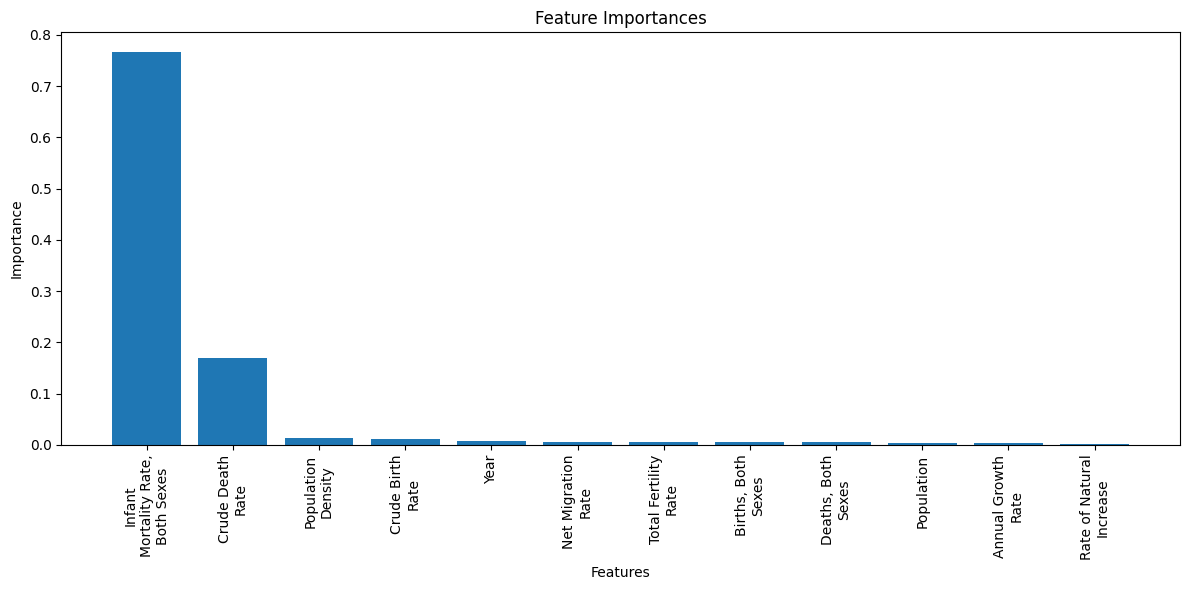

In [86]:
# RF feature importance
importances = best_rf.feature_importances_
features = X_train_no_const.columns

# sorting by importance
indices = np.argsort(importances)[::-1]

# creating wrapped x labels for readability
wrapped_labels = [textwrap.fill(features[i], width=15, break_long_words=False) for i in indices]

# plotting the feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(X_train_no_const.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_no_const.shape[1]), wrapped_labels, rotation=90)
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout() 
plt.show()

<br>
<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
We can't easily determine what is going on inside of our Random Forest model, because it is an ensemble of decision trees. However, we can take a closer look at the very first decision tree in the ensembly of trees.  
</div>
<br>
<br>

In [87]:
from sklearn.tree import export_text

# extracting the very first tree in the ensemble
tree = best_rf.estimators_[0]  

# Getting a text based output of the tree with a depth of 2
tree_text = export_text(tree, feature_names=list(X_train_no_const.columns), max_depth=2)
print(tree_text)

|--- Infant Mortality Rate, Both Sexes <= 37.95
|   |--- Infant Mortality Rate, Both Sexes <= 8.65
|   |   |--- Crude Death Rate <= 12.05
|   |   |   |--- truncated branch of depth 22
|   |   |--- Crude Death Rate >  12.05
|   |   |   |--- truncated branch of depth 14
|   |--- Infant Mortality Rate, Both Sexes >  8.65
|   |   |--- Infant Mortality Rate, Both Sexes <= 26.65
|   |   |   |--- truncated branch of depth 20
|   |   |--- Infant Mortality Rate, Both Sexes >  26.65
|   |   |   |--- truncated branch of depth 18
|--- Infant Mortality Rate, Both Sexes >  37.95
|   |--- Crude Death Rate <= 10.95
|   |   |--- Crude Death Rate <= 7.85
|   |   |   |--- truncated branch of depth 14
|   |   |--- Crude Death Rate >  7.85
|   |   |   |--- truncated branch of depth 18
|   |--- Crude Death Rate >  10.95
|   |   |--- Crude Death Rate <= 13.85
|   |   |   |--- truncated branch of depth 12
|   |   |--- Crude Death Rate >  13.85
|   |   |   |--- truncated branch of depth 14



<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
We can see that the very first split in the decision tree is based on infant mortality rate. If the infant mortality rate is less than 37.95, then the next two major splits following are both for infant mortality rate.  If at the first split the infant mortality rate is greater than 37.95, then the the next two splits are on Crude Death Rate. 

</div>


<br>
<br>


<div style="text-align: left; font-size: 18px; font-family: Georgia;">
We can even go one step further and visualize the entire decision tree.  I have created the code to do so below, so if you would like to see the entire tree, click the link after the following code chunk.

</div>
    
<br>
<br>

In [88]:
# To complete this yourself, you will need to install graphviz.
# https://graphviz.org/download/. Need to download and install the executable
# select add environment path for all users duing installation. Then restart the kernal and run this code.
from sklearn.tree import export_graphviz
import graphviz

# Export the tree to DOT format
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X_train_no_const.columns,  
    filled=True,                   
    rounded=True                   #
)

# save the data to the graph object
graph = graphviz.Source(dot_data)
# Save as SVG for web
graph.render("decision_tree", format="svg")  

'decision_tree.svg'

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Check out the entire first decision tree in the RF ensemble. Be prepared to zoom out!
</div>

<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="decision_tree.svg" target="_blank">
  Interactive Decision Tree (external link)
  </a>
</div>

<br>
<br>


--------------------------------------------------------------------

<br>

<a id="lstm_model"></a>
<h2 style="font-family: Georgia; font-size: 28px;">Neural Net: Long Short-Term Memory (LSTM)</h2>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The final model we will build is a Long Short-Term Memory (LSTM) Neural Network. Neural networks are incredibly powerful tools that have revolutionized many industries over the past decade. An LSTM is a specialized type of Recurrent Neural Network (RNN) designed to excel at modeling time-series data and sequential patterns. <br><br>
Building an LSTM model is not much more complicated than our previous model, the process is quite similar. Take a moment to review the code chunk below to familiarize yourself with the structure and design of an LSTM model.

</div>

<br>
<br>
<br>
<br>
    
<div style="text-align: center; font-size: 18px; font-family: Georgia;">
Check out the Youtube video from StatQuest's Josh Starmer for a detailed explanation.
</div>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.youtube.com/watch?v=YCzL96nL7j0&t=4s" target="_blank">
  Josh Starmer: Long Short-Term Memory (LSTM), Clearly Explained (external link)
  </a>
</div>

<br>
<br>



Model: "Life_Expectancy_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        12,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,651 (49.42 KB)

 Trainable params: 12,651 (49.42 KB)

 Non-trainable params: 0 (0.00 B)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error (MSE): 5.56
R-squared (R2): 0.88


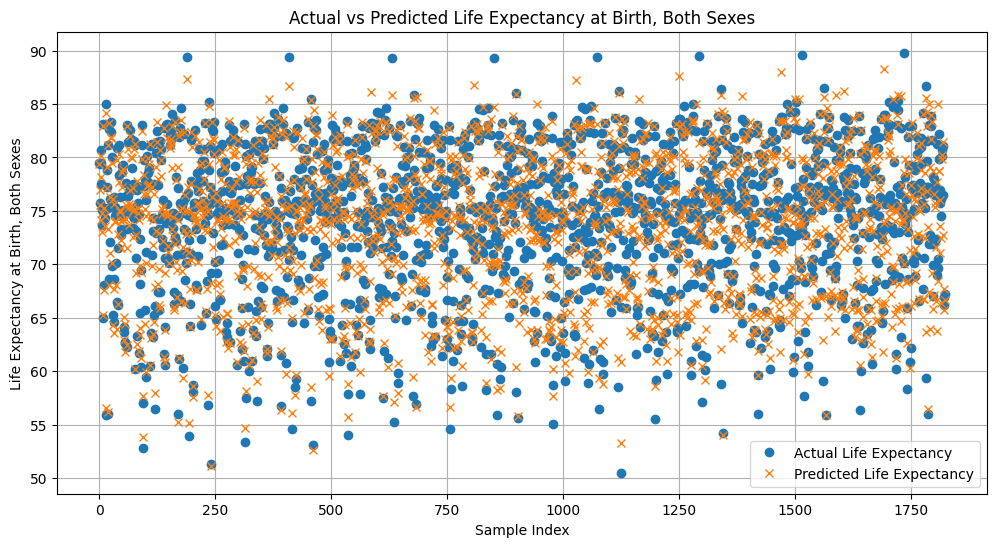

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Setting a seed for reproducability
np.random.seed(37)

df_sorted = df.sort_values(by="Year").reset_index(drop=True)

# Removing the categorical data and target variable from our input Matrix
X_nn = df.drop(["Life Expectancy at Birth, Both Sexes",'GENC','Name'], axis=1)
# creating our target feature variable
y_nn = df["Life Expectancy at Birth, Both Sexes"]

# splitting the data for test
X_train, X_test, y_train, y_test = train_test_split(
    X_nn, y_nn,
    test_size=.33,
    random_state=37,
    shuffle=False)

# Initialize the scaler for features
scaler_X_nn = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler_X_nn.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler_X_nn.transform(X_test)

#Reshape Data for LSTM
timesteps = 1  # Single timestep since no sequence data
n_features = X_train_scaled.shape[1]  # Number of features

# Reshaping the input matrix
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], timesteps, n_features))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], timesteps, n_features))

# building the model
nn_model = Sequential([
    Input(shape=(timesteps, n_features)),  # Explicit Input layer
    LSTM(50, activation='relu'),
    Dense(1)],name="Life_Expectancy_Model")

nn_model.compile(optimizer='adam', loss='mse')
nn_model.summary()

#Training the model with 1000 epoches. Feel free to set to any number you which
# The larger the number, the longer it will take. Turn verbose to 1 below 
# to see progress.
epochs = 1000
batch_size = 16

# Fitting the model. Set the verbose to 1 when running on your own.
history = nn_model.fit(
    X_train_scaled,
    y_train, 
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    verbose=0)

# making predictions
y_pred = nn_model.predict(X_test_scaled).flatten()

# Evaluatin the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

y_test_aligned = pd.Series(y_test).reset_index(drop=True)
y_pred_aligned = pd.Series(y_pred).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(y_test_aligned, label='Actual Life Expectancy', marker='o', linestyle='None')
plt.plot(y_pred_aligned, label='Predicted Life Expectancy', marker='x', linestyle='None')
plt.title('Actual vs Predicted Life Expectancy at Birth, Both Sexes')
plt.xlabel('Sample Index')
plt.ylabel('Life Expectancy at Birth, Both Sexes')
plt.legend()
plt.grid(True)
plt.show()

<div style="text-align: center; font-size: 18px; font-family: Georgia;">
The LSTM model scored about ~90% on it's R² score, by far not the best, but still a very good score! 
</div>

<br>
<br>


--------------------------------------------------------------------

<br>

<a id="future_prediction"></a>
<h1 style="font-family: Georgia; font-size: 28px;">Predicting the Future of Human Life Expectancy</h1>

<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
A major part of the data science pipeline is being able to take your data and turn it into actionable future predictions. These predictions will never be 100% accurate, but that is why in the model engineering phase we searched for models that performed well on the test data and had high cross-validation scores. Models that recieved high R² scores on the test data, especially cross-validation, should generalize better on new, unseen data. The challenge with studying real-world topics like human life expectancy, however, is that we are attempting to predict outcomes using data that has yet to be generated. By the time we have the actual data to feed into our model, the real-world results for life expectancy will already be known. There really is only one solution to this lack of data, we must generate our own data.
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
There are various methods for generating new data to feed into a model, and the process can quickly become complex. If generating accurate future data were easy, many of the world’s challenges would already be solved. One common approach for generating future data in a time-dependent context is called Time Series Forecasting. While powerful, it often involves intricate techniques and assumptions. For the sake of simplicity in this tutorial, we’ll take a slightly different approach. If you’re interested in exploring Time Series Forecasting further, check out the resource from Train in Data linked below.

</div>
<br>
    
<div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.blog.trainindata.com/time-series-forecasting-python/" target="_blank">
  Train in Data - Time Series Forecasting with Python (external link)
  </a>
</div>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
In this tutorial, we will generate our data using a simple linear model for each feature, modeled individually against Year for each country. While this approach may not always be valid depending on your dataset, we will first evaluate its feasibility by calculating the correlation between each feature and Year at the country level. In the next code chunk, we’ll compute these correlations for each country individually and then calculate the mean correlation across all countries. Unlike the global correlation matrix we calculated earlier, this method provides granular insights by isolating the relationship between each feature and Year on a per-country basis.
</div>

<br>
<br>

In [90]:
# Getting the list of features to check correlations
features = list(df.columns[2:].values)

# Initializing the mean correlation dataframe
country_corr_df = pd.DataFrame(columns=["Country"] + features)

# Looping through each country to calculate correlations
for country in df['Name'].unique():
    country_data = df[df['Name'] == country]
    mean_corr_list = [country] 
    
    for feature in features:
        # Checking for sufficient variability in the countries feature 
        if country_data[feature].nunique() > 1 and country_data["Year"].nunique() > 1:
            # calculating the correlation for the feature vs year
            correlation = country_data['Year'].corr(country_data[feature])
            # adding the correlation value to the mean corr list
            mean_corr_list.append(correlation if pd.notnull(correlation) else np.nan)
        # appending nan if there wasnt enough variability in the data
        # very few small countries need this
        else:
            mean_corr_list.append(np.nan)  
    
    # adding the country correlations to the dataframe
    country_corr_df.loc[len(country_corr_df)] = mean_corr_list

# calculating the mean correlation of all countries for every feature
mean_correlations = country_corr_df.iloc[:, 1:].mean() 

# creating a dataframe of the granular corrleations correlations
mean_correlations_df = mean_correlations.reset_index()
mean_correlations_df.columns = ["Feature", "Mean Correlation"]
mean_correlations_df

Feature  Mean Correlation
0                                   Year          1.000000
1                             Population          0.723630
2                     Annual Growth Rate         -0.372863
3               Rate of Natural Increase         -0.673199
4                     Population Density          0.725892
5                   Total Fertility Rate         -0.537820
6                       Crude Birth Rate         -0.756287
7   Life Expectancy at Birth, Both Sexes          0.896897
8      Infant Mortality Rate, Both Sexes         -0.890217
9                       Crude Death Rate         -0.048395
10                    Net Migration Rate          0.142402
11                    Births, Both Sexes         -0.005255
12                    Deaths, Both Sexes          0.485378

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The granular correlations in the table above tell a very different story compared to the global correlations between features and Year. While the absolute mean global correlation was just 9.5%, analyzing the correlations at the country level reveals a significantly higher absolute mean correlation of 52.2%. This indicates much stronger relationships when considering countries individually, even with some features lowering the overall mean.
</div>

<br>
<br>


<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The following code chunk will iteratively generate new data for every country for the years 2025-2050 using simple linear regression.  We can expand the years further into the future, but as we do so, we will make continuously more unreliable predictions.
</div>
    <br>
        <br>

In [91]:
from sklearn.linear_model import LinearRegression

# Setting a seed for reproducability
np.random.seed(37)

# defining the prediction range (feel free to play around with the years)
future_years = np.arange(2025, 2051)  

# Initializing a list to hold predictions
country_predictions = []

# grouping the data by country the data by country
grouped_data = df.groupby("Name")  

# Looping over each country
for country_name, group in grouped_data:
    # Country prediction dataframes
    country_future_data = {"Year": future_years}

    # Looping over the countries features
    features_to_predict = group.drop(columns=["Year", "Name", "GENC"]).columns
    for feature in features_to_predict:
        # Prepare the data to be fed into a linear model
        years = group["Year"].values.reshape(-1, 1)  
        feature_values = group[feature].values      
        
        # Training the linear regression model for the specific country and feature
        pred_model = LinearRegression()
        pred_model.fit(years, feature_values)
        
        # Making the predictions for the feature for the feature range defined above
        predictions = pred_model.predict(future_years.reshape(-1, 1))
        country_future_data[feature] = predictions

    # creating a dataframe of the country predictions
    country_future_df = pd.DataFrame(country_future_data)
    country_future_df["Name"] = country_name  

    # adding the country data to country predictions
    country_predictions.append(country_future_df)

# Creating a dataframe of all predictions and assigning the country name to the first column
future_predictions_df = pd.concat(country_predictions, ignore_index=True)
columns = ["Name"] + [col for col in future_predictions_df.columns if col != "Name"]
future_predictions_df = future_predictions_df[columns]

# Showing the last 5 rows of the dataframe
future_predictions_df.tail(5) # View the last few rows

Name  Year    Population  Annual Growth Rate  \
5715  Zimbabwe  2046  2.034011e+07              3.7450   
5716  Zimbabwe  2047  2.052373e+07              3.8141   
5717  Zimbabwe  2048  2.070734e+07              3.8832   
5718  Zimbabwe  2049  2.089096e+07              3.9523   
5719  Zimbabwe  2050  2.107457e+07              4.0214   

      Rate of Natural Increase  Population Density  Total Fertility Rate  \
5715                  3.234092           52.623846              3.279246   
5716                  3.263754           53.100077              3.262777   
5717                  3.293415           53.576308              3.246308   
5718                  3.323077           54.052538              3.229838   
5719                  3.352738           54.528769              3.213369   

      Crude Birth Rate  Life Expectancy at Birth, Both Sexes  \
5715         27.642154                             92.870154   
5716         27.474923                             93.932923   
5717         27.307692                             94.995692   
5718         27.140462                             96.058462   
5719         26.973231                             97.121231   

      Infant Mortality Rate, Both Sexes  Crude Death Rate  Net Migration Rate  \
5715                          11.914462         -4.717077            5.085538   
5716                          10.916769         -5.181462            5.479231   
5717                           9.919077         -5.645846            5.872923   
5718                           8.921385         -6.110231            6.266615   
5719                           7.923692         -6.574615            6.660308   

      Births, Both Sexes  Deaths, Both Sexes  
5715       583592.961538            -5629.06  
5716       587011.639231           -10261.25  
5717       590430.316923           -14893.44  
5718       593848.994615           -19525.63  
5719       597267.672308           -24157.82

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
That’s it! We now have data for the years 2025–2050, ready to be fed into our models to make future predictions. We’ll follow the same steps as before to generate predictions using our newly created data. <br><br>Every step in our predictions must follow exactly the same steps we took to create the model. If we added a bias, then we must add the bias back. If we removed the bias, standardized the data, then added the bias back, we must follow this same exact strict pipeline. <br><br> A data pipeline can encompass various topics in data science. In the context of this tutorial, it refers to the specific, sequential transformations and processes applied to the data. While we’re skipping over the automation of this pipeline here, you can explore more about building automated pipelines on Hazelcast, linked below:
</div>

<br>


  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://hazelcast.com/foundations/event-driven-architecture/data-pipeline/" target="_blank">
  Hazelcast - What is a Data Pipeline? (external link)
  </a>
</div>

<br>
<br>

In [92]:
# Creating our feature matrix and target variable
X = future_predictions_df.drop(["Life Expectancy at Birth, Both Sexes", "Name"], axis=1)
y = future_predictions_df['Life Expectancy at Birth, Both Sexes']

-----------------------------------------------------------

<br>
<br>

<div style="text-align: left; font-size: 24px; font-family: Georgia;">
Basic Linear Model Prediction
</div>

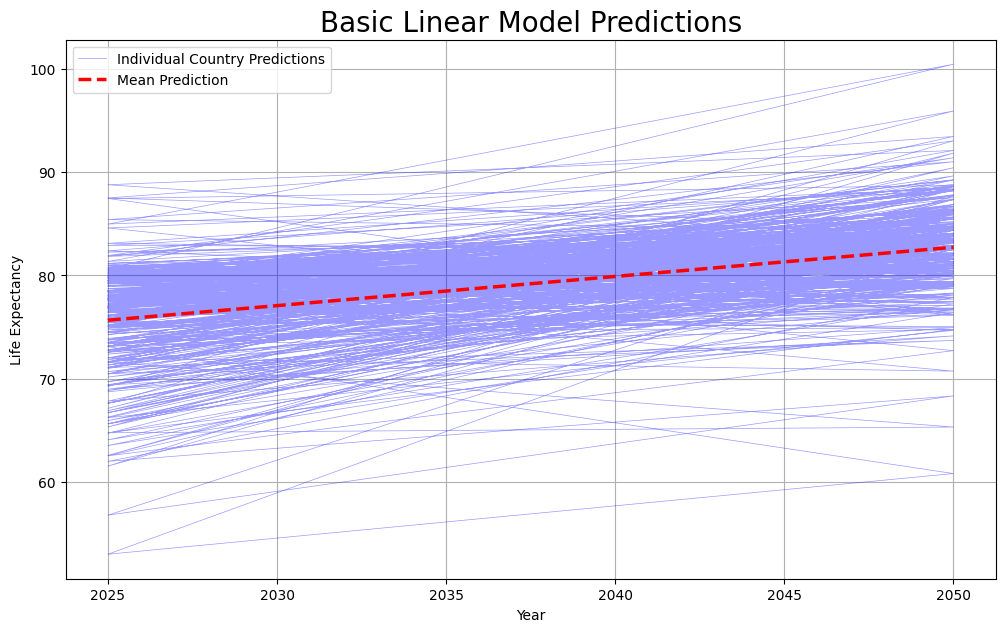

High Life Expectancies: ['Angola', 'Azerbaijan', 'Macao', 'Northern Mariana Islands', 'Qatar', 'Rwanda', 'Singapore', 'Uganda', 'Zambia']
Low Life Expectancies: ['Central African Republic', 'Somalia', 'Yemen']


In [93]:
# Setting the figure size
plt.figure(figsize=(12,7))

# adding the bias
X_with_const = sm.add_constant(X, has_constant="add")

# plotting all predictions
plt.plot(
    X["Year"],
    basic_model.predict(X_with_const),
    label="Individual Country Predictions",
    linestyle="solid",
    linewidth=0.5,
    color="blue",
    alpha=0.4)

# Calculating the mean prediction for each year
future_predictions_df["Predicted Life Expectancy"] = basic_model.predict(X_with_const)
mean_predictions = (future_predictions_df.groupby("Year")["Predicted Life Expectancy"].mean())

# Plotting the mean prediction line
plt.plot(
    mean_predictions.index,
    mean_predictions.values,
    label="Mean Prediction",
    linestyle="dashed",
    linewidth=2.5,
    color="red")

# decorating the plot
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Basic Linear Model Predictions", size=20)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Getting the high and low countries
target_year = future_predictions_df['Year'] == 2050
tar_pred = future_predictions_df['Predicted Life Expectancy']

print(f"High Life Expectancies: {list(future_predictions_df['Name'][(tar_pred > 90) & (target_year)].unique())}")
print(f"Low Life Expectancies: {list(future_predictions_df['Name'][(tar_pred < 70) & (target_year)].unique())}")

-----------------------------------------------------------

<br>
<br>

<div style="text-align: left; font-size: 24px; font-family: Georgia;">
Scaled Polynomial Model Prediction
</div>

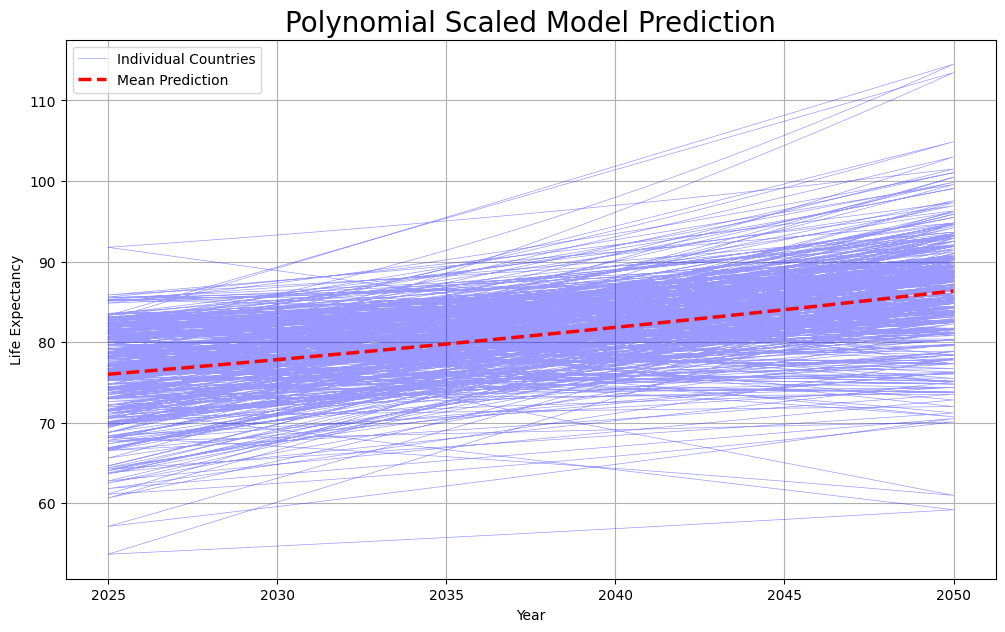

High Life Expectancies: ['Azerbaijan', 'Malawi', 'Monaco', 'Northern Mariana Islands', 'Rwanda', 'Saint Pierre and Miquelon', 'Zambia']
Low Life Expectancies: ['Georgia', 'Somalia']


In [94]:
# Setting the figure size
plt.figure(figsize=(12,7))

# Pipeline of transformations
X_future = X
X_future_scaled = scaler_poly.transform(X_future)
X_future_scaled = pd.DataFrame(X_future_scaled, columns=X_future.columns, index=X_future.index)
X_future_scaled = sm.add_constant(X_future_scaled)
X_test_interaction = poly_scale.transform(X_future_scaled)
interaction_feature_names = poly_scale.get_feature_names_out(X_future_scaled.columns)
X_test_interaction_df = pd.DataFrame(X_test_interaction, columns=interaction_feature_names, index=X_future_scaled.index)

# Individual country predictions
plt.plot(
    X["Year"],
    scaled_poly_model.predict(X_test_interaction_df),
    label="Individual Countries",
    linestyle="solid",
    linewidth=0.5,
    color="blue",
    alpha=0.4)

# Calculating the mean prediction for each year
future_predictions_df["Predicted Life Expectancy"] = scaled_poly_model.predict(X_test_interaction_df)
mean_predictions = (future_predictions_df.groupby("Year")["Predicted Life Expectancy"].mean())

# Plotting the mean prediction
plt.plot(
    mean_predictions.index,
    mean_predictions.values,
    label="Mean Prediction",
    linestyle="dashed",
    linewidth=2.5,
    color="red")

# Decorating the plot
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Polynomial Scaled Model Prediction", size=20)
plt.legend()
plt.grid(True)

# displaying the plot
plt.show()

# Getting the high and low countries
target_year = future_predictions_df['Year'] == 2050
tar_pred = future_predictions_df['Predicted Life Expectancy']

print(f"High Life Expectancies: {list(future_predictions_df['Name'][(tar_pred > 100) & (target_year)].unique())}")
print(f"Low Life Expectancies: {list(future_predictions_df['Name'][(tar_pred < 70) & (target_year)].unique())}")

-----------------------------------------------------------

<br>
<br>

<div style="text-align: left; font-size: 24px; font-family: Georgia;">
Ridge Model Prediction
</div>

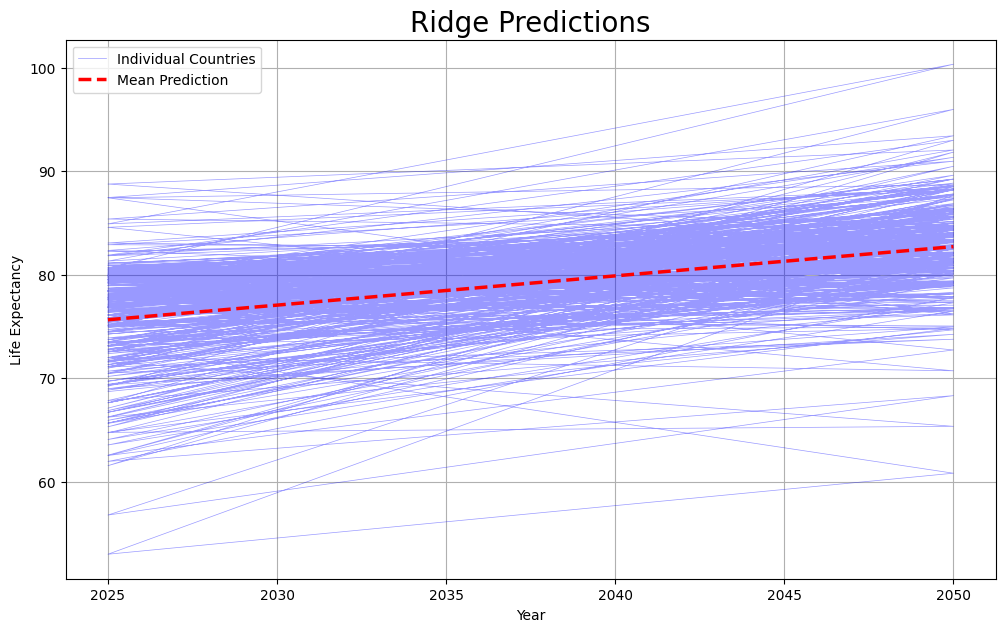

High Life Expectancies: ['Angola', 'Azerbaijan', 'Macao', 'Northern Mariana Islands', 'Qatar', 'Rwanda', 'Singapore', 'Uganda', 'Zambia']
Low Life Expectancies: ['Central African Republic', 'Somalia', 'Yemen']


In [95]:
# Setting the plot size
plt.figure(figsize=(12,7))

# Transformation pipeline
X_future = X
X_future_scaled = scaler_rl.transform(X_future)
X_future_scaled = sm.add_constant(X_future_scaled)

# Individual country predictions
plt.plot(
    X["Year"],
    ridge.predict(X_future_scaled),
    label="Individual Countries",
    linestyle="solid",
    linewidth=0.5,
    color="blue",
    alpha=0.4)

# Calculating the mean predictions for each year
future_predictions_df["Predicted Life Expectancy"] =  ridge.predict(X_future_scaled)
mean_predictions = (future_predictions_df.groupby("Year")["Predicted Life Expectancy"].mean())

# Plotting the mean predictions
plt.plot(
    mean_predictions.index,
    mean_predictions.values,
    label="Mean Prediction",
    linestyle="dashed",
    linewidth=2.5,
    color="red")

# Decorating the plot
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Ridge Predictions", size=20)
plt.legend()
plt.grid(True)

# displaying the plot
plt.show()

# Getting the high and low countries
target_year = future_predictions_df['Year'] == 2050
tar_pred = future_predictions_df['Predicted Life Expectancy']

print(f"High Life Expectancies: {list(future_predictions_df['Name'][(tar_pred > 90) & (target_year)].unique())}")
print(f"Low Life Expectancies: {list(future_predictions_df['Name'][(tar_pred < 70) & (target_year)].unique())}")

-----------------------------------------------------------

<br>
<br>

<div style="text-align: left; font-size: 24px; font-family: Georgia;">
Lasso Model Prediction
</div>

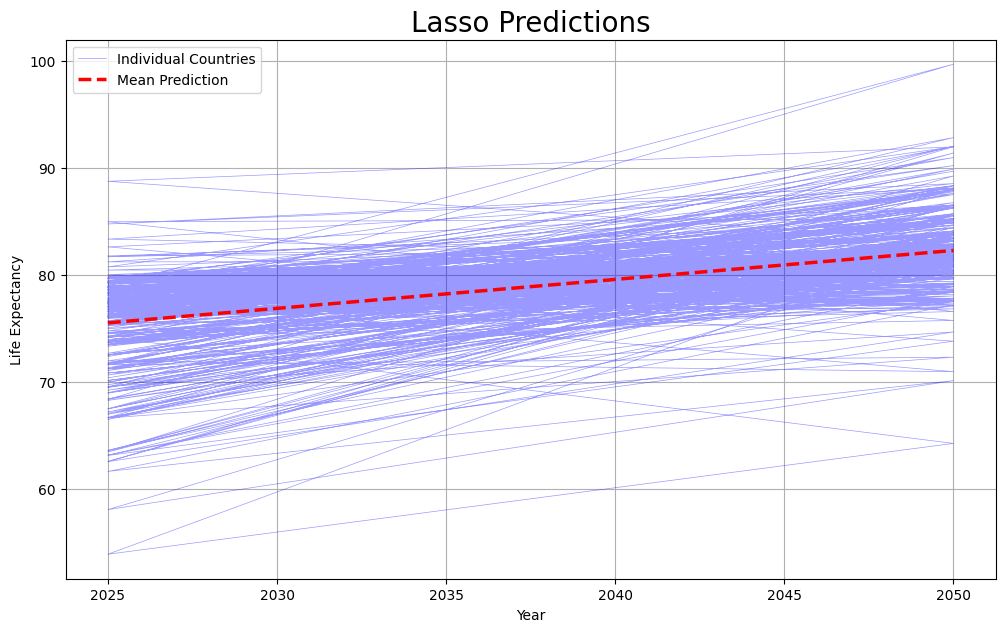

High Life Expectancies: ['Angola', 'Azerbaijan', 'Macao', 'Malawi', 'Nepal', 'Rwanda', 'Uganda', 'Zambia']
Low Life Expectancies: ['Somalia']


In [96]:
plt.figure(figsize=(12,7))

# Transformation pipeline
X_future = X

X_future_scaled = scaler_rl.transform(X_future)
X_future_scaled = sm.add_constant(X_future_scaled)

# Individual country predictions
plt.plot(
    X["Year"],
    lasso.predict(X_future_scaled),
    label="Individual Countries",
    linestyle="solid",
    linewidth=0.5,
    color="blue",
    alpha=0.4)

# Calculating the mean predictions for each year
future_predictions_df["Predicted Life Expectancy"] =  lasso.predict(X_future_scaled)
mean_predictions = (future_predictions_df.groupby("Year")["Predicted Life Expectancy"].mean())

# Plotting the mean predictions
plt.plot(
    mean_predictions.index,
    mean_predictions.values,
    label="Mean Prediction",
    linestyle="dashed",
    linewidth=2.5,
    color="red")

# Decorating the plot
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Lasso Predictions", size = 20)
plt.legend()
plt.grid(True)

# displaying the plot
plt.show()

# Getting the high and low countries
target_year = future_predictions_df['Year'] == 2050
tar_pred = future_predictions_df['Predicted Life Expectancy']

print(f"High Life Expectancies: {list(future_predictions_df['Name'][(tar_pred > 90) & (target_year)].unique())}")
print(f"Low Life Expectancies: {list(future_predictions_df['Name'][(tar_pred < 70) & (target_year)].unique())}")

-----------------------------------------------------------

<br>
<br>

<div style="text-align: left; font-size: 24px; font-family: Georgia;">
Random Forest Model Prediction
</div>

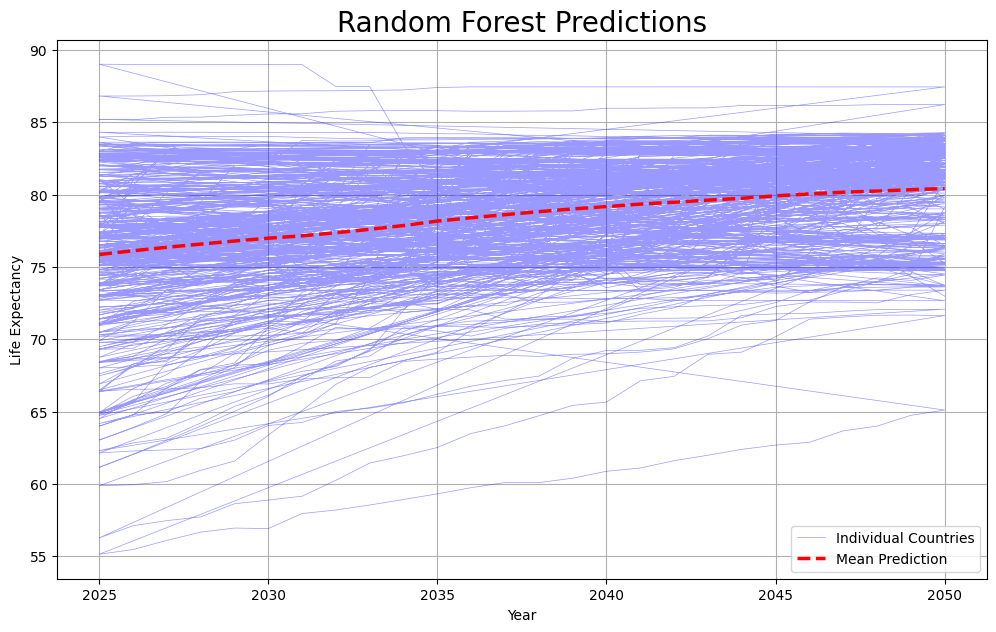

High Life Expectancies: ['Macao', 'Singapore']
Low Life Expectancies: ['Somalia']


In [97]:
plt.figure(figsize=(12,7))

# Individual country predictions
plt.plot(
    X["Year"],
    best_rf.predict(X),
    label="Individual Countries",
    linestyle="solid",
    linewidth=0.5,
    color="blue",
    alpha=0.4)

# Calculating the mean predictions for each year
future_predictions_df["Predicted Life Expectancy"] = best_rf.predict(X)
mean_predictions = (future_predictions_df.groupby("Year")["Predicted Life Expectancy"].mean())

# Plotting the mean predictions
plt.plot(
    mean_predictions.index,
    mean_predictions.values,
    label="Mean Prediction",
    linestyle="dashed",
    linewidth=2.5,
    color="red")

# Decorating the plot
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Random Forest Predictions", size=20)

plt.legend()
plt.grid(True)

# displaying the plot
plt.show()

# Getting the high and low countries
target_year = future_predictions_df['Year'] == 2050
tar_pred = future_predictions_df['Predicted Life Expectancy']

print(f"High Life Expectancies: {list(future_predictions_df['Name'][(tar_pred > 85) & (target_year)].unique())}")
print(f"Low Life Expectancies: {list(future_predictions_df['Name'][(tar_pred < 70) & (target_year)].unique())}")

-----------------------------------------------------------

<br>
<br>

<div style="text-align: left; font-size: 24px; font-family: Georgia;">
Long Short-Term Memory (LSTM) Model Predictions
</div>

179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


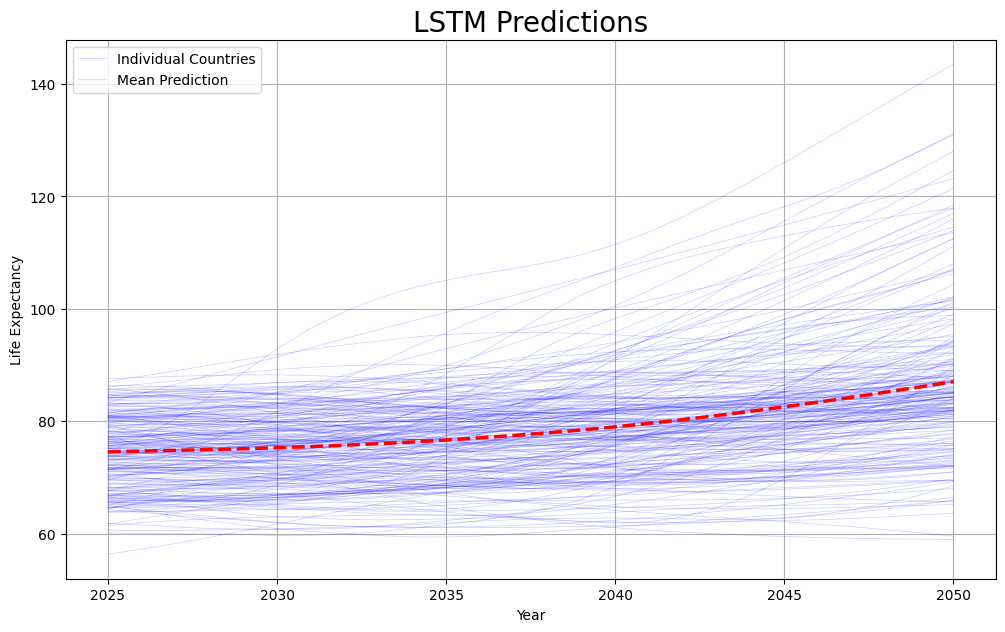

High Life Expectancies: ['Angola', 'Azerbaijan', 'Bhutan', 'Montserrat', 'Rwanda', 'Uganda', 'Zambia']
Low Life Expectancies: ['Algeria', 'Djibouti', 'Germany', 'Kiribati', 'Macao', 'Malaysia', 'Monaco', 'Panama', 'Papua New Guinea', 'Suriname', 'Timor Leste', 'Turkmenistan', 'Tuvalu', 'Uzbekistan', 'Venezuela']


In [98]:
# Setting a seed for reproducability
np.random.seed(37)

# Grabbing the column names
feature_columns = list(X_nn.columns)

# Getting the future prediction dataframe we created early
X_new = future_predictions_df[feature_columns].values

# scaling the features using the fitted nn scaler
X_new_scaled = scaler_X_nn.transform(pd.DataFrame(X_new, columns=feature_columns))

# defining hyperparameters timesteps and features
timesteps = 1
n_features = X_new_scaled.shape[1]

# correcting the shape of the input
X_new_scaled = X_new_scaled.reshape((X_new_scaled.shape[0], timesteps, n_features))

# creating the predictions
y_new_pred = nn_model.predict(X_new_scaled).flatten()

# adding the predictions to the dataframe
future_predictions_df["Predicted Life Expectancy"] = y_new_pred

# Calculating the mean prediction per year
mean_predictions = (future_predictions_df.groupby("Year")["Predicted Life Expectancy"].mean())

# plotting all predictions
plt.figure(figsize=(12, 7))
for country, group in future_predictions_df.groupby("Name"):
    plt.plot(
        group["Year"],
        group["Predicted Life Expectancy"],
        color="blue",
        alpha=0.2,
        linewidth=0.5)

# plotting the mean prediction
plt.plot(
    mean_predictions.index,
    mean_predictions.values,
    label="Mean Prediction",
    linestyle="dashed",
    linewidth=2.5,
    color="red")

# decorating the plot
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("LSTM Predictions", size=20)
plt.legend(["Individual Countries", "Mean Prediction"])
plt.grid(True)

# displaying the plot
plt.show()

# Getting the high and low countries
target_year = future_predictions_df['Year'] == 2050
tar_pred = future_predictions_df['Predicted Life Expectancy']
print(f"High Life Expectancies: {list(future_predictions_df['Name'][(tar_pred > 120) & (target_year)].unique())}")
print(f"Low Life Expectancies: {list(future_predictions_df['Name'][(tar_pred < 70) & (target_year)].unique())}")

--------------------------------------------------

<br>

<a id="report-summary"></a>
<h1 style="font-family: Georgia; font-size: 28px;">Report Summary Phase of the Data Science Pipeline</h1>

<br>
<br>

<div style="text-align: left; font-size: 18px; font-family: Georgia;">
The Report Summary phase of the data science pipeline is a critical stage where you present your findings into a concise and clear report that can be effectively communicated to stakeholders. Even the best analysis in the world will fail to make an impact if the insights are not communicated properly. In this phase you will pull out key insights from your analysis to tell the story of your data. If the story is too overwhelming, you risk losing the stakeholders' attention, but if it's too underwhelming, your results may leave more questions than answers. The goal is to tell a complete story as succinctly as possible while being prepared to address follow-up questions. One such follow-up question could revolve around the specific data cleaning steps you took in your pipeline, so it could be recommended to include those details at the end of your presentation or report so they are available if stakeholders ask for them. If there are no questions from the stakeholders then that’s great, but it’s always best to be prepared. For more information on creating reports for stakholders, check out this article from <em> Optimal Workshop </em> on creating reports and presenting data to stakeholders, linked below.

</div>
<br>

  <div style="text-align: center; font-size: 16px; font-family: Georgia;">
  <a href="https://www.optimalworkshop.com/blog/how-to-present-data-to-stakeholders" target="_blank">
  Optimal Workshop - How to Present Data to Stakeholders (external link)
  </a>
</div>


<br><br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
Since this is a tutorial designed for the educational purpose of teaching the data science pipeline, I won’t create a full stakeholder report. However, I’ve provided a brief textual summary of our findings below. 
</div>
<br>


------------------------------------------------------
<br>
<br>

<div style="text-align: left; font-size: 24px; font-family: Georgia;">
Summary of Findings
</div>

<br>
<div style="text-align: left; font-size: 18px; font-family: Georgia;">
In this project, we analyzed data from 220 countries world-wide from the year 2000 to 2024 to identify underlying trends that affect human life expectancy. The data was collected from the United States Census Bureau’s International Database, linked here:  <a href="https://www.census.gov/data-tools/demo/idb/" target="_blank">US Census Bureau IDB</a>. We found that several of our dataset’s features were highly correlated to human life expectancy, with the strongest relationship occurring as a negative correlation with infant mortality rate. 
<br>
<br>
Crude birth rate and total fertility rate also had a strong negative correlation to human life expectancy. When analyzing the crude birth rate against total fertility rate, we found a very strong positive correlation of 98%, as well as an obvious pattern of countries in Africa having the highest birth rate and highest expectation of children per woman.  Furthermore, analysis showed that India and China comprise of 35% of the world’s population, but doesn’t even rank in the top 40 countries when comparing births per 1,000 people. One highly likely explanation for this is due to the high crude death rate and infant mortality rate on the African continent, as revealed in our analysis. Countries with high infant mortality rates had strikingly lower life expectancies, with the African continent displaying this correlation the strongest.  
<br>
<br>
The mean life expectancy in 2000 was 68.39 and increased to 75.1 by 2024. When we checked the data using various machine learning models, the Random Forest model performed the best with an achieved Test R² of 0.99075, or 99% explained variability in human life expectancy.  Random Forest determined the most important feature and appropriate root node was infant mortality rate, followed by splits on either infant mortality rate or crude death rate, the second most important feature determined by RF. 
<br>
<br>
Finally, we predicted human life expectancy using  6 different machine learning algorithms until the year 2050, and received mean life expectancy results for the year 2050 ranging from 80 years to about 95 years, with 5 of the 6 models giving results between 80 years and 88 years for life expectancy. The model with the best score, Random Forest, predicted human life expectancy will be around 81 years in 2050.  
<br>
<br>
Country specific life expectancies were also calculated, but due to the rapid gain in human life expectancy from developing nations during this time period, the results were slightly skewed to favor these developing nations in the future. The Random Forest Model was the only model that appropriately limited these developing nations from dominantly taking top spots in human life expectancy. Random Forest determined that the two countries with the highest life expectancies in 2050 were Macao and Singapore. The country with the lowest human life expectancy in 2050 is predicted to be Somalia.

</div>
<br>
